# FAANG STOCK PREDICTIONS

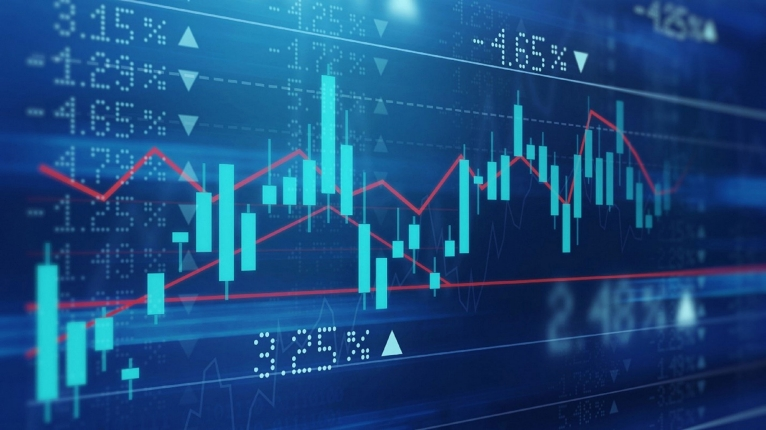

In [5]:
# !pip install yfinance==0.1.70
# !pip install yahoo-fin==0.8.9.1
# !pip install mplfinance

# Imports

In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpdates
import seaborn as sns
import yfinance as yf
from yahoo_fin import stock_info

import datetime
from dateutil.parser import parse

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber


from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Scraping the Data
We utilize **'yfinance'** and **'yahoo-fin'**, which have APIs that make web scraping really simple and practical, to gather all the stock data of the S&P500 businesses. I was able to develop a dataset that **daily updating** harvests stock data for the S&P500 firms using this web scraper. The Scrapped data Folder contains the results. 

### How the Web Scraper Works:
> - We compile a list of "tickers," or stock ticker symbols, for each of the S&P 500 firms. We use the 'tickers sp500()' function, which provides a list of every company that is included in the S&P500.
We collect the previous stock prices for that specific firm when we iterate over the size of the ticker list. The function "yf.Ticker()" accepts the firm name. After that, we use the history(period = "max") function to gather the company's stock prices.
> - The final file is saved in the ".csv" format with the name "dataframe_names[i]".

In [3]:
tickers = stock_info.tickers_sp500()
dataframe_names = [ticker for ticker in tickers]
print('Web scraper starting.....')
for i in range(len(tickers)):
  historical_stock_prices = (yf.Ticker(tickers[i])).history(period = 'max')
  historical_stock_prices.to_csv(dataframe_names[i] + '.csv')


Web scraper starting.....


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,0,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,142572401,0,0.0
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,124826132,0,0.0
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,104429967,0,0.0
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,98825037,0,0.0
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,183633734,0,0.0


# Exploratory Data Analysis (EDA)
Before we start predicting stock prices of the FAANG companies we need to explore the dataset first. We will be considering the `Date`, `Open`, `High`, `Low`, `Close` and `Volume` columns of the dataset while performing our analysis.

In [4]:

df_meta = pd.read_csv("C:\\Users\\SHUBHAM SAINI\\Desktop\\Scrapped_Data\\META.csv")
df_aapl = pd.read_csv("C:\\Users\\SHUBHAM SAINI\\Desktop\\Scrapped_Data\\AAPL.csv")
df_amzn = pd.read_csv("C:\\Users\\SHUBHAM SAINI\\Desktop\\Scrapped_Data\\AMZN.csv")
df_nflx = pd.read_csv("C:\\Users\\SHUBHAM SAINI\\Desktop\\Scrapped_Data\\NFLX.csv")
df_goog = pd.read_csv("C:\\Users\\SHUBHAM SAINI\\Desktop\\Scrapped_Data\\GOOG.csv")

print('\t\tStart Date\t\tEnd Date')
print('META\t\t{}\t\t{}'.format(df_meta['Date'][0], df_meta.iloc[-1, 0]))
print('AAPL\t\t{}\t\t{}'.format(df_aapl['Date'][0], df_aapl.iloc[-1, 0]))
print('AMZN\t\t{}\t\t{}'.format(df_amzn['Date'][0], df_amzn.iloc[-1, 0]))
print('NFLX\t\t{}\t\t{}'.format(df_nflx['Date'][0], df_nflx.iloc[-1, 0]))
print('GOOG\t\t{}\t\t{}'.format(df_goog['Date'][0], df_goog.iloc[-1, 0]))

df_meta['Date'] = df_meta.Date.apply(parse)
df_aapl['Date'] = df_aapl.Date.apply(parse)
df_amzn['Date'] = df_amzn.Date.apply(parse)
df_nflx['Date'] = df_nflx.Date.apply(parse)
df_goog['Date'] = df_goog.Date.apply(parse)

		Start Date		End Date
META		2012-05-18		2022-07-12
AAPL		1980-12-12		2022-07-12
AMZN		1997-05-15		2022-07-12
NFLX		2002-05-23		2022-07-12
GOOG		2004-08-19		2022-07-12


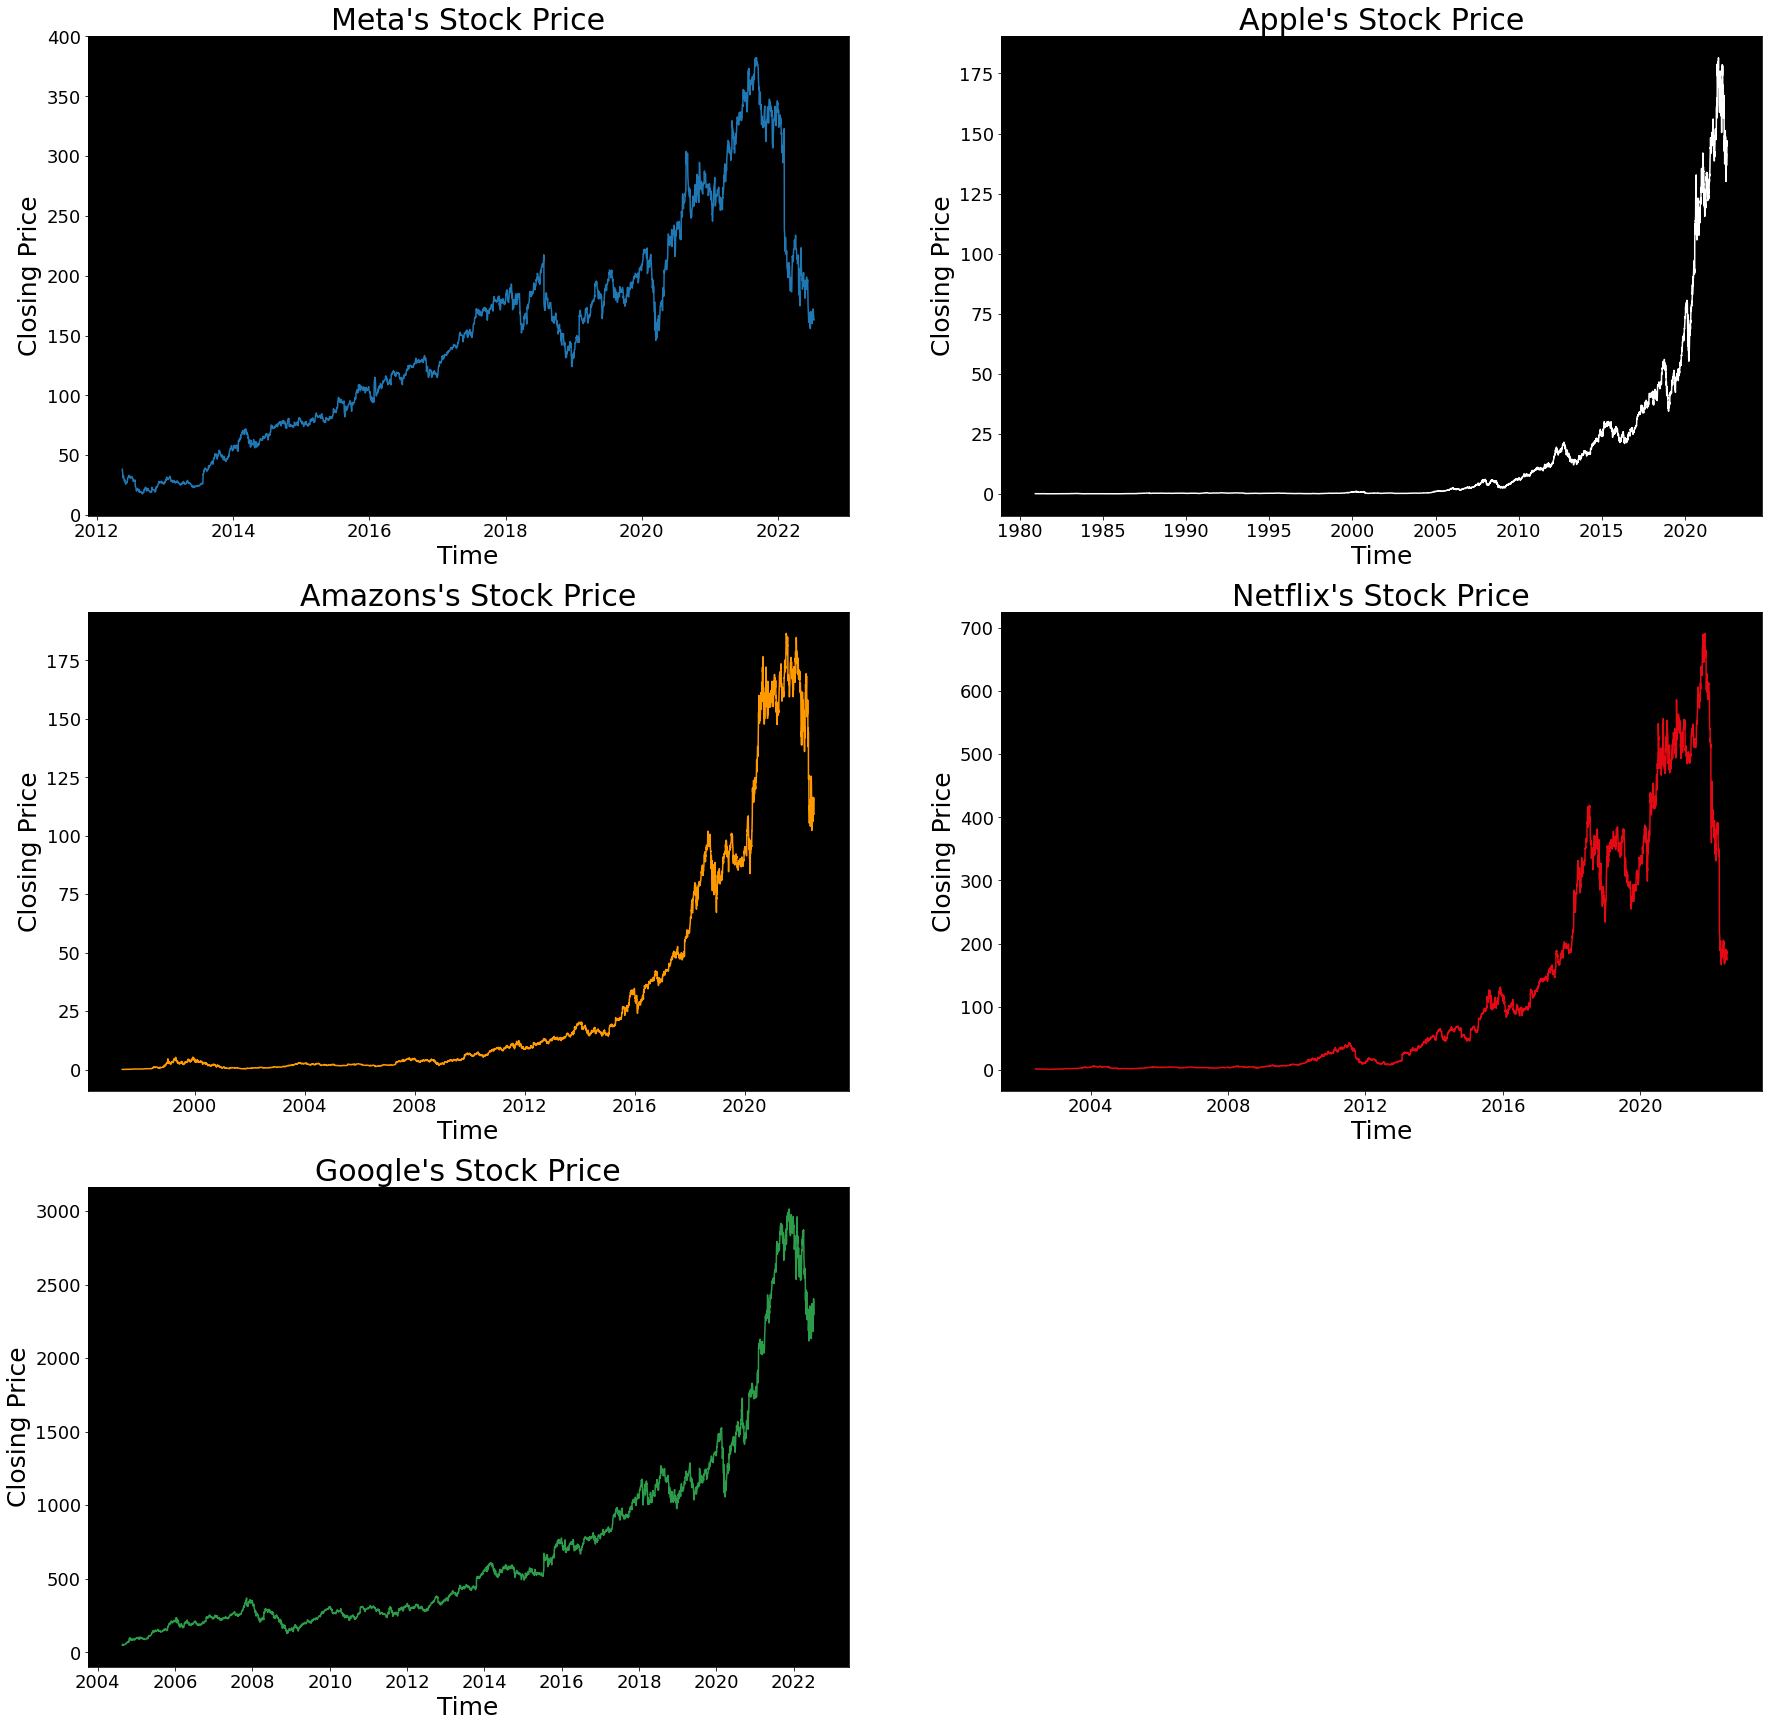

In [5]:
def visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(df_meta['Date'], df_meta['Close'])
    axes[0][0].set_title("Meta's Stock Price", fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Closing Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Close'], color = 'white')
    axes[0][1].set_title("Apple's Stock Price", fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Closing Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)

    axes[1][0].set_facecolor('black')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Close'], color = '#FF9900')
    axes[1][0].set_title("Amazons's Stock Price", fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Closing Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)

    axes[1][1].set_facecolor('black')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Close'], color = '#E50913')
    axes[1][1].set_title("Netflix's Stock Price", fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Closing Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)

    axes[2][0].set_facecolor('black')
    axes[2][0].plot(df_goog['Date'], df_goog['Close'], color = '#2B9D4A')
    axes[2][0].set_title("Google's Stock Price", fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Closing Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)

    plt.show()
    
visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

**Observations**: 
We start by examining the companies **Closing Prices**. The final price at which a stock traded during an ordinary trading day is known as the closing price. The common benchmark used by investors to monitor a stock's performance over time is its closing price. The graphs show that from 2020 to 2022, the closing prices of all the equities decreased dramatically. This is a result of the COVID-19 epidemic, which caused a stock market collapse.

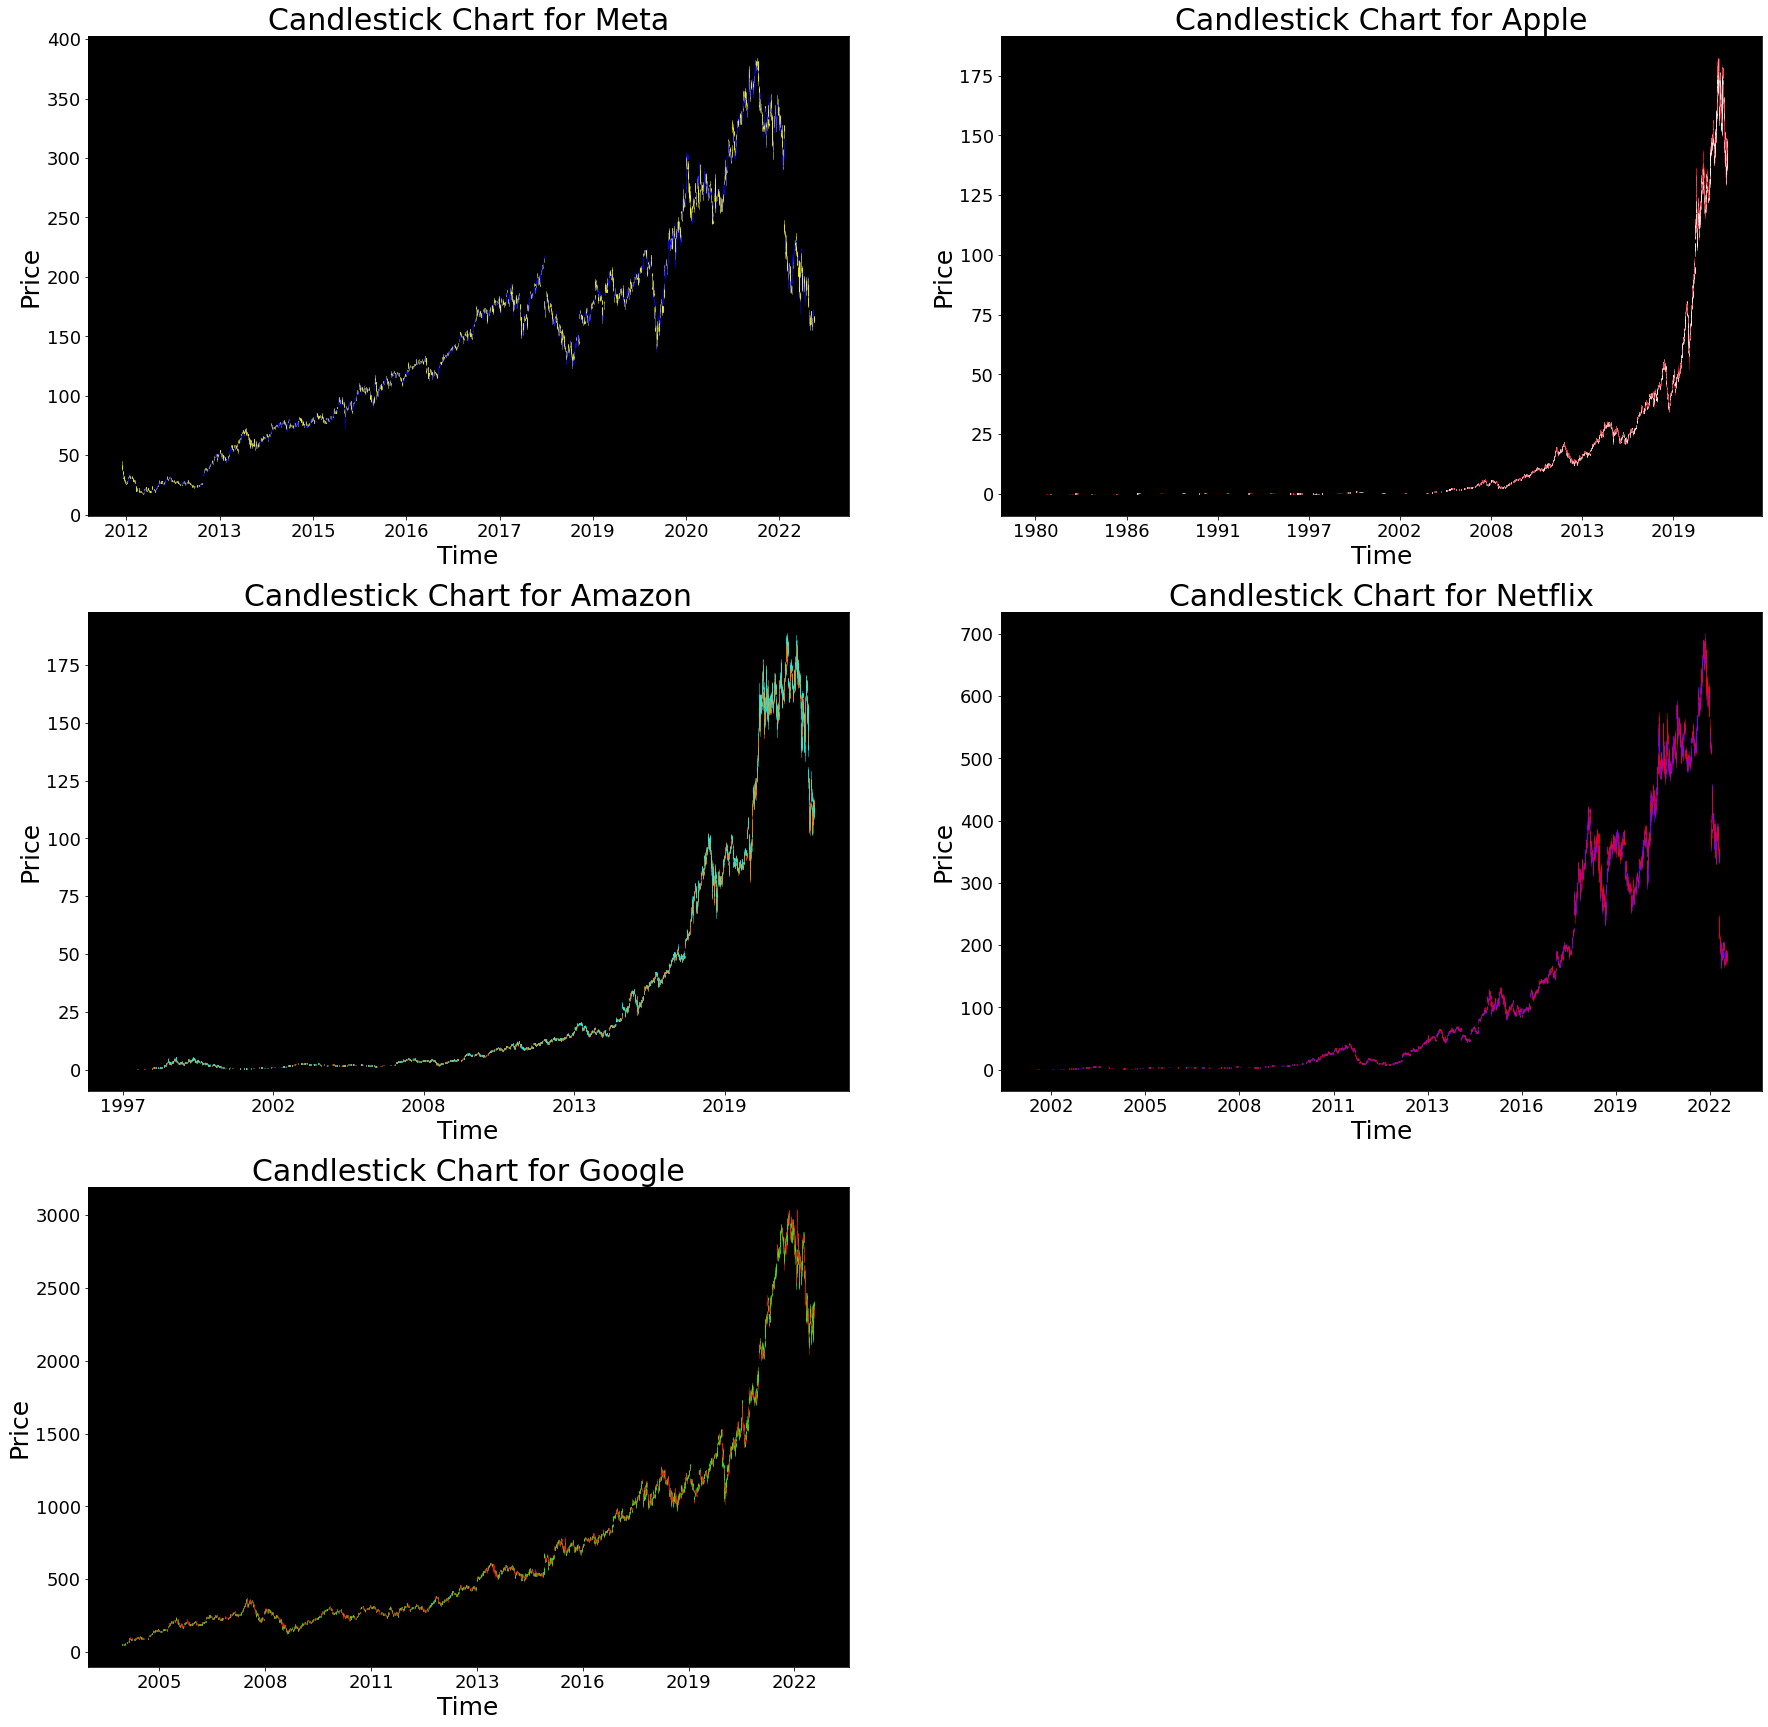

In [6]:
def visualize_faang_candlestick_charts(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']

    new_meta_df = df_meta[candlestick_chart_data]
    new_aapl_df = df_aapl[candlestick_chart_data]
    new_amzn_df = df_amzn[candlestick_chart_data]
    new_nflx_df = df_nflx[candlestick_chart_data]
    new_goog_df = df_goog[candlestick_chart_data]

    new_meta_df['Date'] = new_meta_df['Date'].map(mpdates.date2num)
    new_aapl_df['Date'] = new_aapl_df['Date'].map(mpdates.date2num)
    new_amzn_df['Date'] = new_amzn_df['Date'].map(mpdates.date2num)
    new_nflx_df['Date'] = new_nflx_df['Date'].map(mpdates.date2num)
    new_goog_df['Date'] = new_goog_df['Date'].map(mpdates.date2num)

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    axes[0][0].set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes[0][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[0][0], new_meta_df.values, colorup = '#0000FF', colordown = '#FFFF00', alpha = 0.8)
    axes[0][0].set_title('Candlestick Chart for Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)

    axes[0][1].set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes[0][1].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[0][1], new_aapl_df.values, colorup = '#FFFFFF', colordown = '#E50913', alpha = 0.8)
    axes[0][1].set_title('Candlestick Chart for Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)

    axes[1][0].set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes[1][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[1][0], new_amzn_df.values, colorup = '#FF8000', colordown = '#01FFFF', alpha = 0.8)
    axes[1][0].set_title('Candlestick Chart for Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)

    axes[1][1].set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes[1][1].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[1][1], new_nflx_df.values, colorup = '#8000FF', colordown = '#FF0000', alpha = 0.8)
    axes[1][1].set_title('Candlestick Chart for Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)

    axes[2][0].set_facecolor('black')
    date_format = mpdates.DateFormatter('%Y')
    axes[2][0].xaxis.set_major_formatter(date_format)
    candlestick_ohlc(axes[2][0], new_goog_df.values, colorup = '#37F713', colordown = '#F71111', alpha = 0.8)
    axes[2][0].set_title('Candlestick Chart for Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)

    plt.show()
    
visualize_faang_candlestick_charts(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

**Observations**: An OHLC (Open High Low Close) chart is a particular form of graph that is frequently used to show how the price of a financial instrument has changed over time. The chart's vertical lines each represent a price range over a single unit of time, including the highest and lowest prices. Because of the global pandemic, the OHLC charts show a dramatic fall from 2020 to 2022, much like the Closing Prices graph.

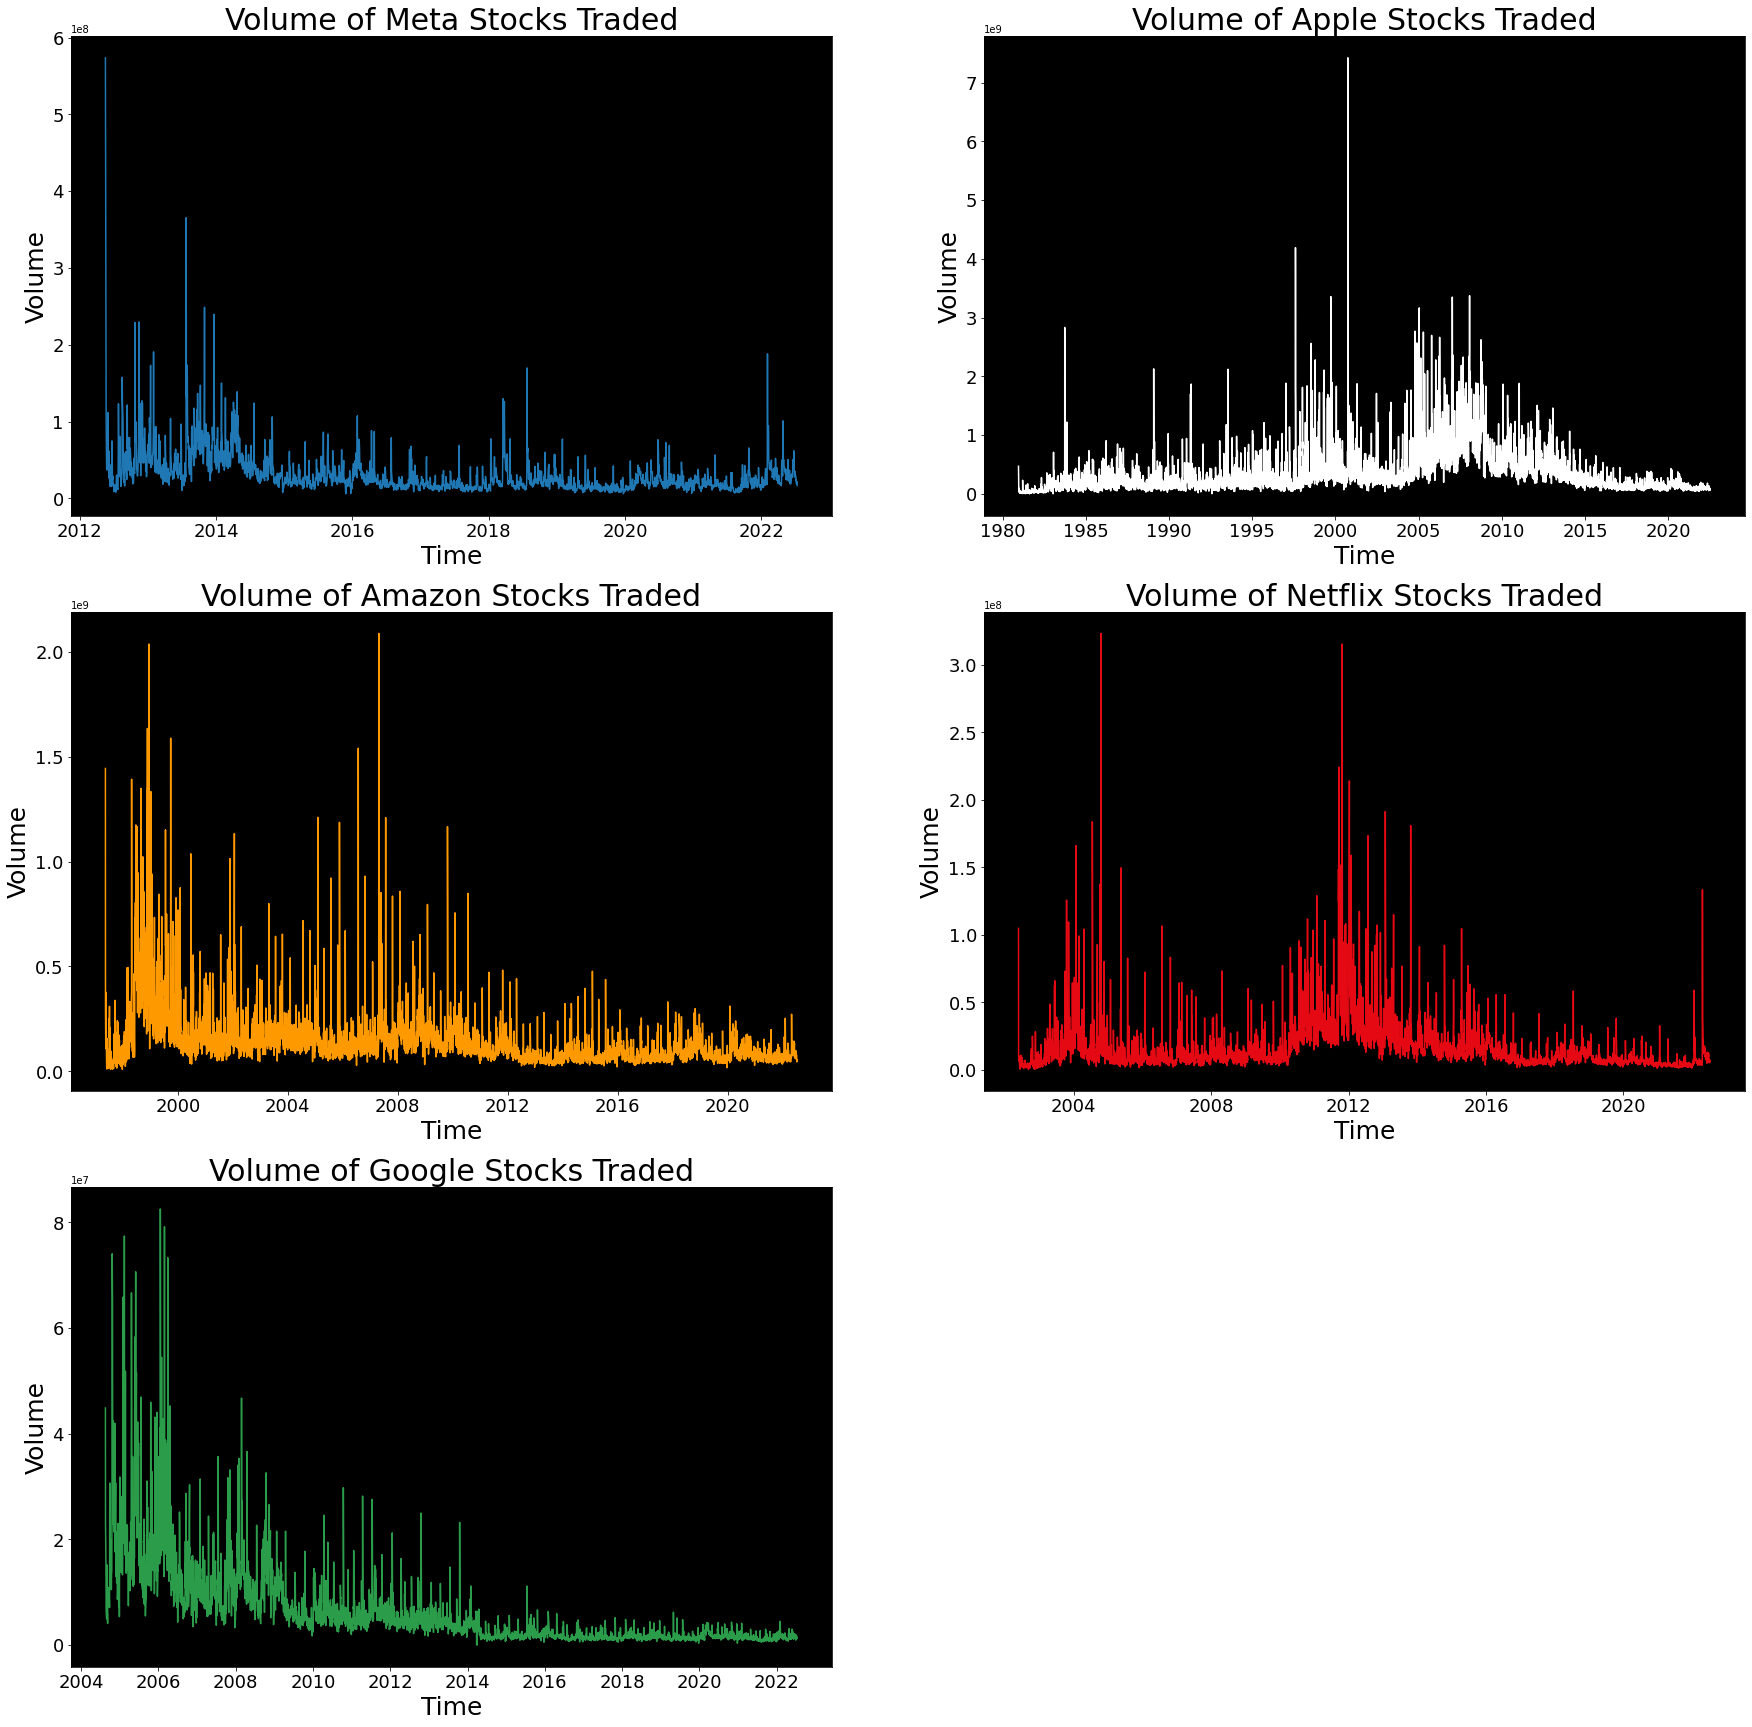

In [7]:
def visualize_faang_stock_volume(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(df_meta['Date'], df_meta['Volume'])
    axes[0][0].set_title("Volume of Meta Stocks Traded", fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Volume', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Volume'], color = 'white')
    axes[0][1].set_title("Volume of Apple Stocks Traded", fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Volume', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)

    axes[1][0].set_facecolor('black')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Volume'], color = '#FF9900')
    axes[1][0].set_title("Volume of Amazon Stocks Traded", fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Volume', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)

    axes[1][1].set_facecolor('black')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Volume'], color = '#E50913')
    axes[1][1].set_title("Volume of Netflix Stocks Traded", fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Volume', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)

    axes[2][0].set_facecolor('black')
    axes[2][0].plot(df_goog['Date'], df_goog['Volume'], color = '#2B9D4A')
    axes[2][0].set_title("Volume of Google Stocks Traded", fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Volume', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)

    plt.show()
    
visualize_faang_stock_volume(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

**Observations**: A stock's volume is the total number of shares that were traded for that stock. About the volume of the stock, there is no especially discernible pattern. We can see that the volume of stock exchanged when a firm was first listed is higher than the amount traded right now for some companies, including **Meta** and **Google**. This is a result of the stock price's long-term rise.

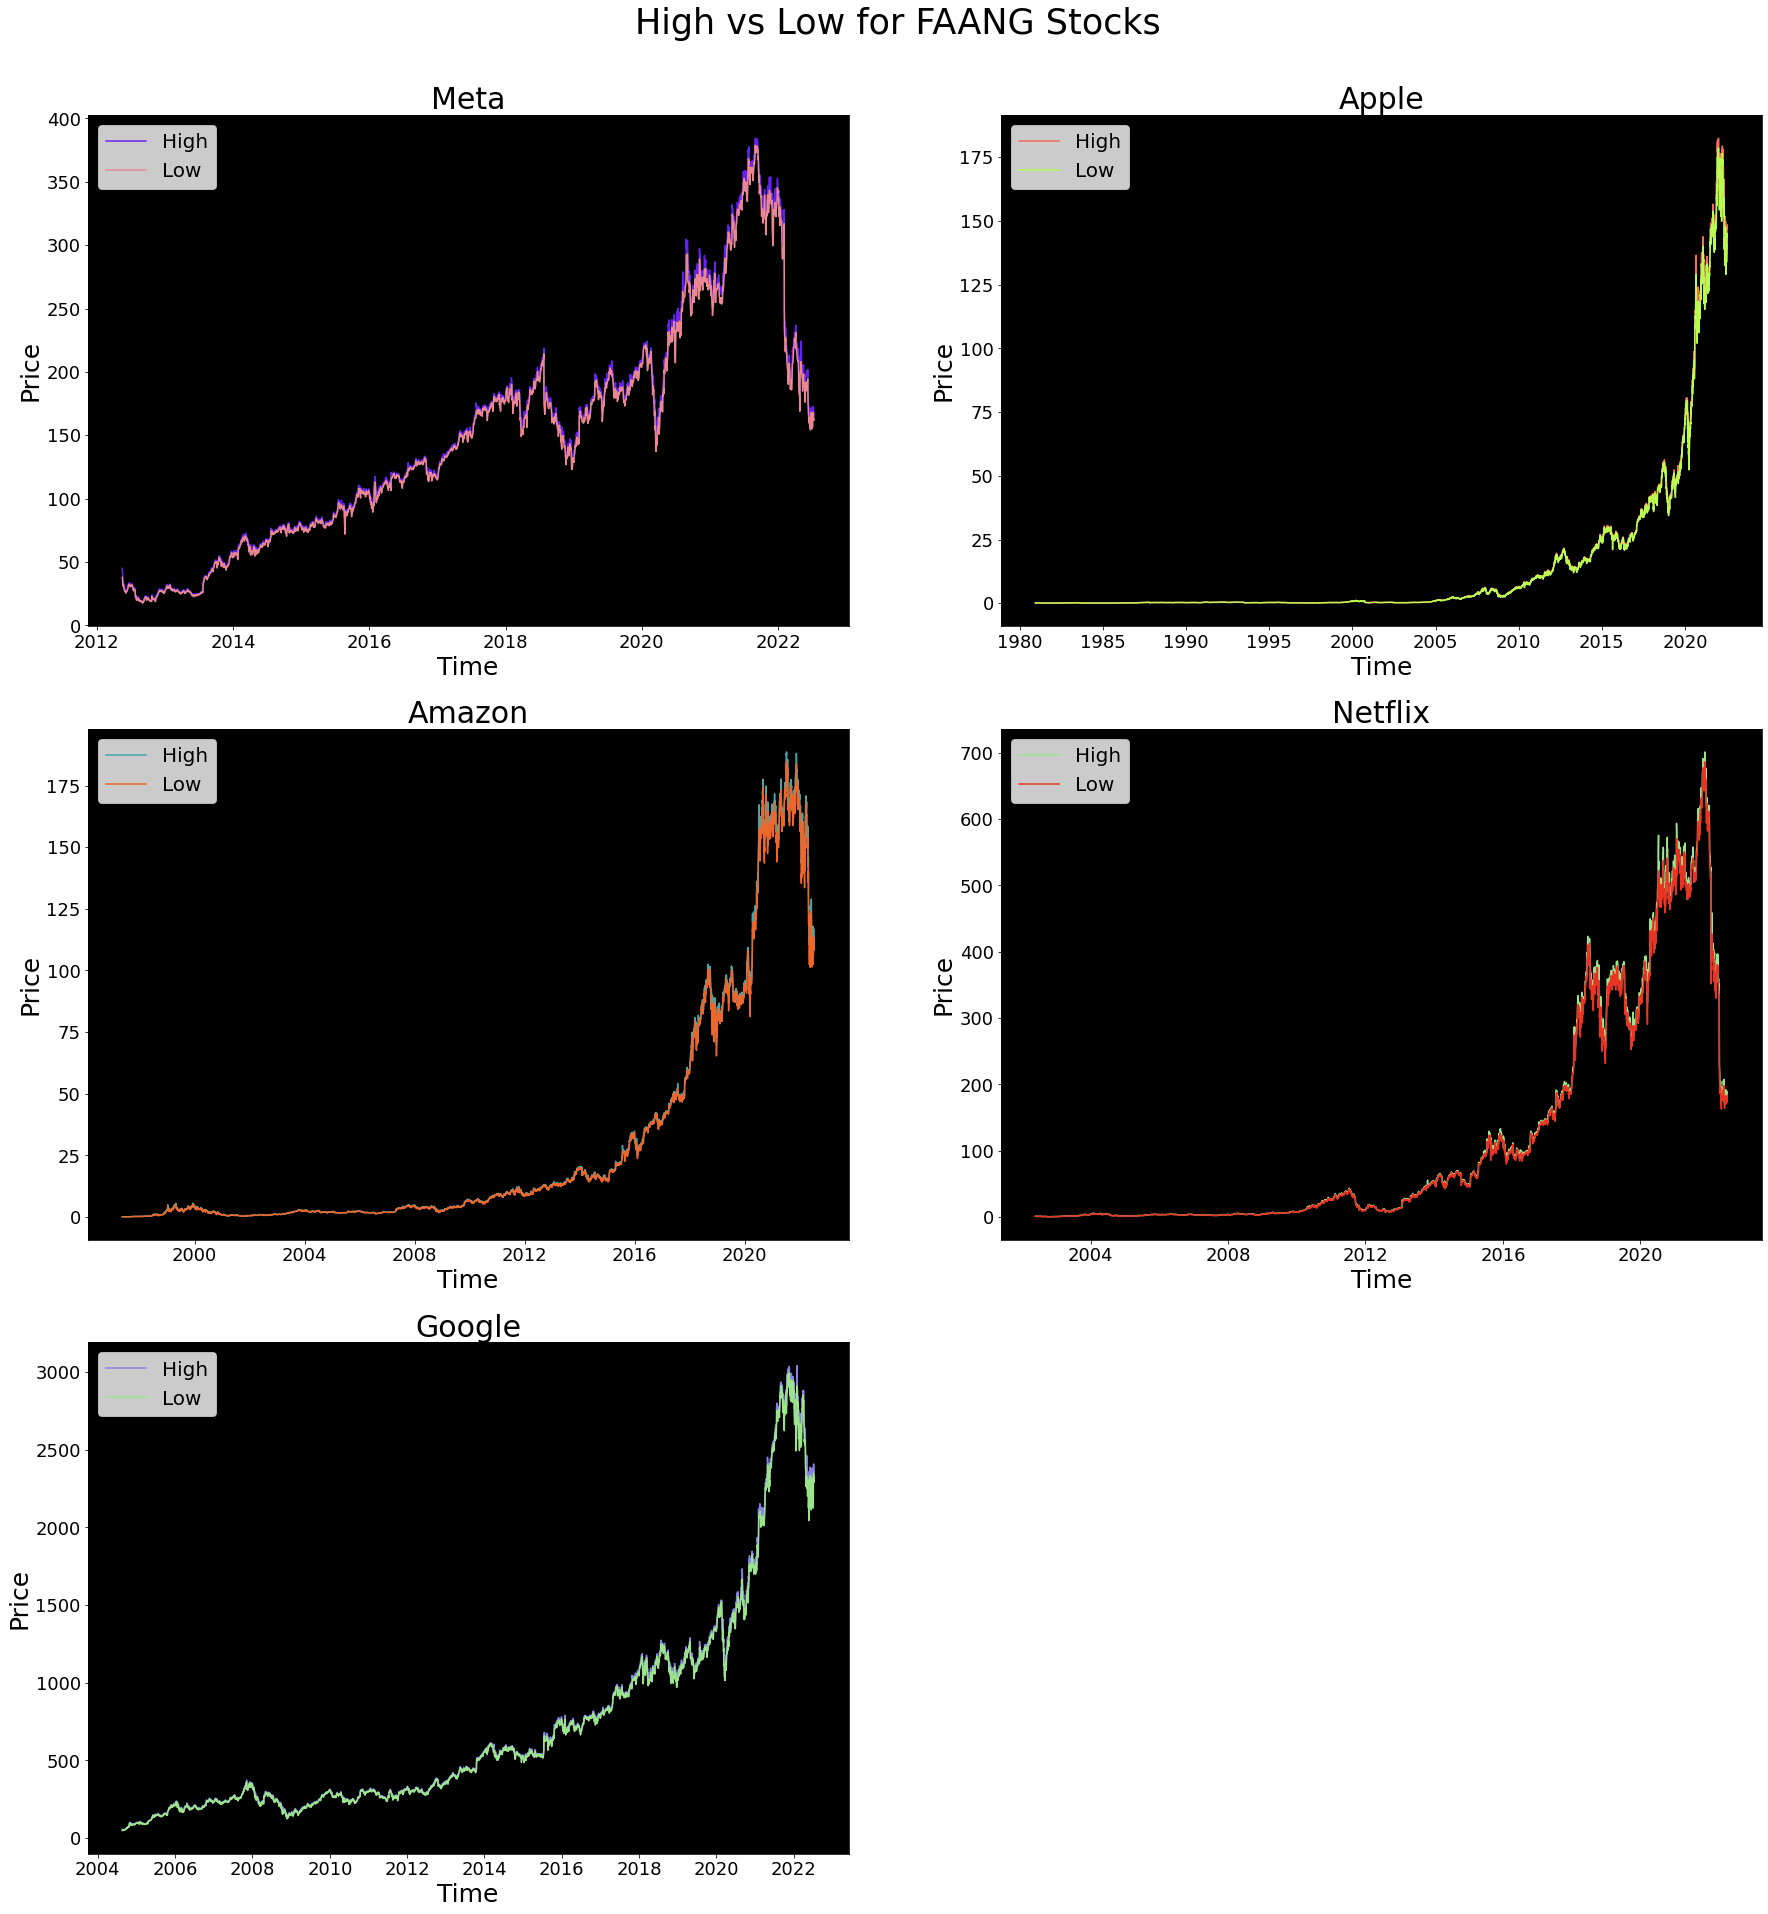

In [8]:
def visualize_faang_two_features_over_time_graph(df_meta, df_aapl, df_amzn, df_nflx, df_goog, time, feature1, feature2):
    
    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
    
    plt.suptitle(feature1 + ' vs ' + feature2 + ' for FAANG Stocks', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(df_meta[time], df_meta[feature1], color = '#6522F5', label = feature1)
    axes[0][0].plot(df_meta[time], df_meta[feature2], color = '#EB8791', label = feature2)
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 20)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(df_aapl[time], df_aapl[feature1], color = '#F26E55', label = feature1)
    axes[0][1].plot(df_aapl[time], df_aapl[feature2], color = '#B9FB50', label = feature2)
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 20)
    
    axes[1][0].set_facecolor('black')
    axes[1][0].plot(df_amzn[time], df_amzn[feature1], color = '#47A5A8', label = feature1)
    axes[1][0].plot(df_amzn[time], df_amzn[feature2], color = '#ED672C', label = feature2)
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 20)
    
    axes[1][1].set_facecolor('black')
    axes[1][1].plot(df_nflx[time], df_nflx[feature1], color = '#9BE48B', label = feature1)
    axes[1][1].plot(df_nflx[time], df_nflx[feature2], color = '#EB3323', label = feature2)
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 20)
    
    axes[2][0].set_facecolor('black')
    axes[2][0].plot(df_goog[time], df_goog[feature1], color = '#8783E3', label = feature1)
    axes[2][0].plot(df_goog[time], df_goog[feature2], color = '#9BE48B', label = feature2)
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 20)
    
    plt.subplots_adjust(top = 0.93)
    plt.show()
    
visualize_faang_two_features_over_time_graph(df_meta, df_aapl, df_amzn, df_nflx, df_goog, 'Date', 'High', 'Low')

The high is the price at which a stock is traded at any given time, as noted. The low is the lowest price during that time. The intraday high and low of a stock are frequently referred to as its daily high and low. The stock prices' **High** and **Low** nearly overlap, showing that the day's Highs and Lows fell within a similar range. There are a few exceptions, when the value of **'High'** increases in proportion to the value of **'Low'**. They can point to a bullish market.

In [9]:
candlestick_chart_data = ['Date', 'Open', 'High', 'Low', 'Close']
new_meta_df = df_meta[candlestick_chart_data]
new_aapl_df = df_aapl[candlestick_chart_data]
new_amzn_df = df_amzn[candlestick_chart_data]
new_nflx_df = df_nflx[candlestick_chart_data]
new_goog_df = df_goog[candlestick_chart_data]

def create_moving_averages_columns(company_data):
    days_for_moving_averages = [10, 50, 100]
    
    for moving_averages in days_for_moving_averages:
        column = f'MA for {moving_averages} days'
        company_data[column] = company_data['Close'].rolling(moving_averages).mean()
        
    return company_data

new_meta_df = create_moving_averages_columns(new_meta_df)
new_aapl_df = create_moving_averages_columns(new_aapl_df)
new_amzn_df = create_moving_averages_columns(new_amzn_df)
new_nflx_df = create_moving_averages_columns(new_nflx_df)
new_goog_df = create_moving_averages_columns(new_goog_df)

new_meta_df.tail(10)

,Date,Open,High,Low,Close,MA for 10 days,MA for 50 days,MA for 100 days
2543,2022-06-28,169.899994,171.300003,160.610001,160.679993,162.967001,188.412800,201.008601
2544,2022-06-29,163.570007,166.330002,160.320007,163.940002,162.988002,187.476200,200.270401
2545,2022-06-30,162.149994,165.229996,158.490005,161.250000,162.178001,186.355000,199.512001
2546,2022-07-01,160.309998,160.619995,155.000000,160.029999,162.094002,185.547200,198.863201
2547,2022-07-05,158.139999,168.250000,157.020004,168.190002,162.539001,185.149600,198.343301
2548,2022-07-06,168.199997,171.589996,165.460007,169.770004,163.811002,184.862800,197.721001
2549,2022-07-07,169.449997,172.720001,167.779999,172.190002,165.445001,184.566800,197.162201
2550,2022-07-08,169.979996,172.399994,168.149994,170.880005,166.658002,184.365400,196.675501
2551,2022-07-11,167.070007,167.490005,161.910004,162.880005,165.930002,184.124001,196.127301
2552,2022-07-12,164.800003,165.910004,162.100006,163.270004,165.308002,183.274801,195.550001


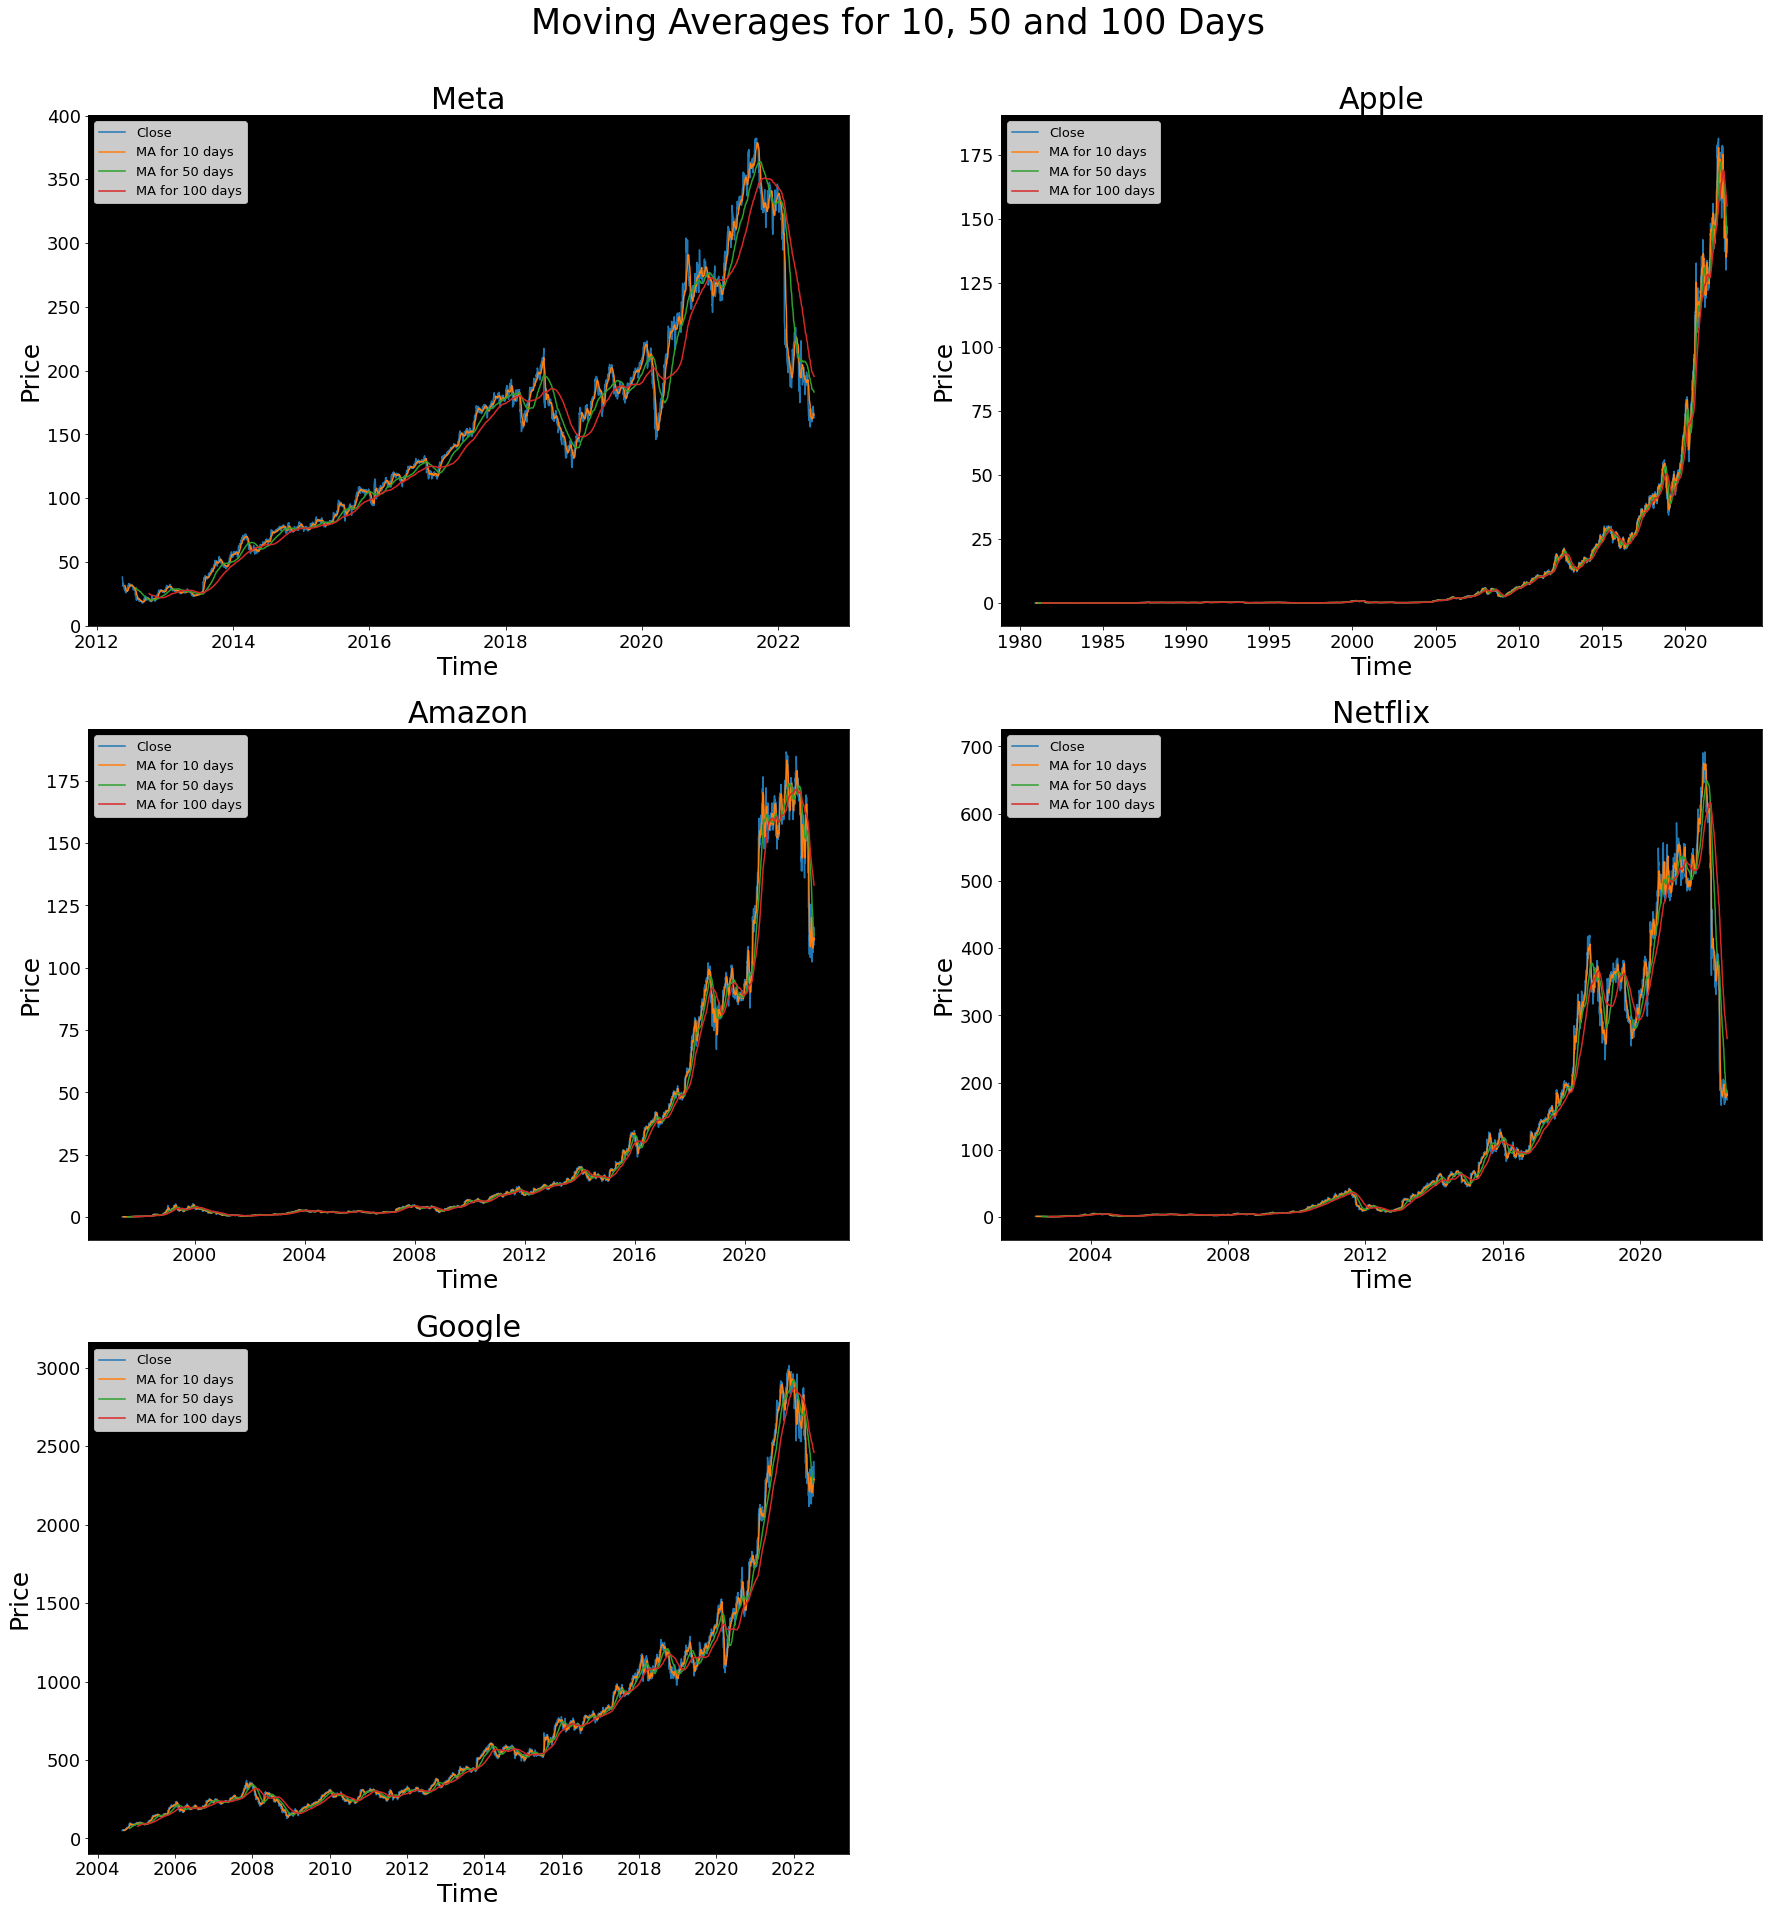

In [10]:
def visualize_moving_averages(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df, time, feature, ma1, ma2, ma3):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    plt.suptitle('Moving Averages for 10, 50 and 100 Days', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(new_meta_df[time], new_meta_df[feature], label = feature)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma1], label = ma1)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma2], label = ma2)
    axes[0][0].plot(new_meta_df[time], new_meta_df[ma3], label = ma3)
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 13)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[feature], label = feature)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma1], label = ma1)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma2], label = ma2)
    axes[0][1].plot(new_aapl_df[time], new_aapl_df[ma3], label = ma3)
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 13)
    
    axes[1][0].set_facecolor('black')
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[feature], label = feature)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma1], label = ma1)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma2], label = ma2)
    axes[1][0].plot(new_amzn_df[time], new_amzn_df[ma3], label = ma3)
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 13)
    
    axes[1][1].set_facecolor('black')
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[feature], label = feature)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma1], label = ma1)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma2], label = ma2)
    axes[1][1].plot(new_nflx_df[time], new_nflx_df[ma3], label = ma3)
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 13)
    
    axes[2][0].set_facecolor('black')
    axes[2][0].plot(new_goog_df[time], new_goog_df[feature], label = feature)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma1], label = ma1)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma2], label = ma2)
    axes[2][0].plot(new_goog_df[time], new_goog_df[ma3], label = ma3)
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 13)

    plt.subplots_adjust(top = 0.93)
    plt.show()

visualize_moving_averages(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df, 'Date', 'Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days')

**OBSERVATIONS** Moving averages (MA) are one of the most well-liked and frequently applied technical indicators in the financial markets. A moving average, which is typically charted alongside the closing price, is an indicator that displays the average value of a stock's price over a period (such as 10 days, 50 days, 100 days, etc.). Moving averages are most frequently used to "detect the prevailing direction" and "calculate support and resistance levels." Moving averages are also used to reduce the **noise** of short-term price movements, making it easier to recognize and define important underlying patterns. A statistical analysis of the stock's average value over a specific time period is used to calculate a moving average.

In [11]:
new_meta_df['Daily Return'] = new_meta_df['Close'].pct_change()
new_aapl_df['Daily Return'] = new_aapl_df['Close'].pct_change()
new_amzn_df['Daily Return'] = new_amzn_df['Close'].pct_change()
new_nflx_df['Daily Return'] = new_nflx_df['Close'].pct_change()
new_goog_df['Daily Return'] = new_goog_df['Close'].pct_change()
new_meta_df.tail()

,Date,Open,High,Low,Close,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
2548,2022-07-06,168.199997,171.589996,165.460007,169.770004,163.811002,184.862800,197.721001,0.009394
2549,2022-07-07,169.449997,172.720001,167.779999,172.190002,165.445001,184.566800,197.162201,0.014255
2550,2022-07-08,169.979996,172.399994,168.149994,170.880005,166.658002,184.365400,196.675501,-0.007608
2551,2022-07-11,167.070007,167.490005,161.910004,162.880005,165.930002,184.124001,196.127301,-0.046816
2552,2022-07-12,164.800003,165.910004,162.100006,163.270004,165.308002,183.274801,195.550001,0.002394


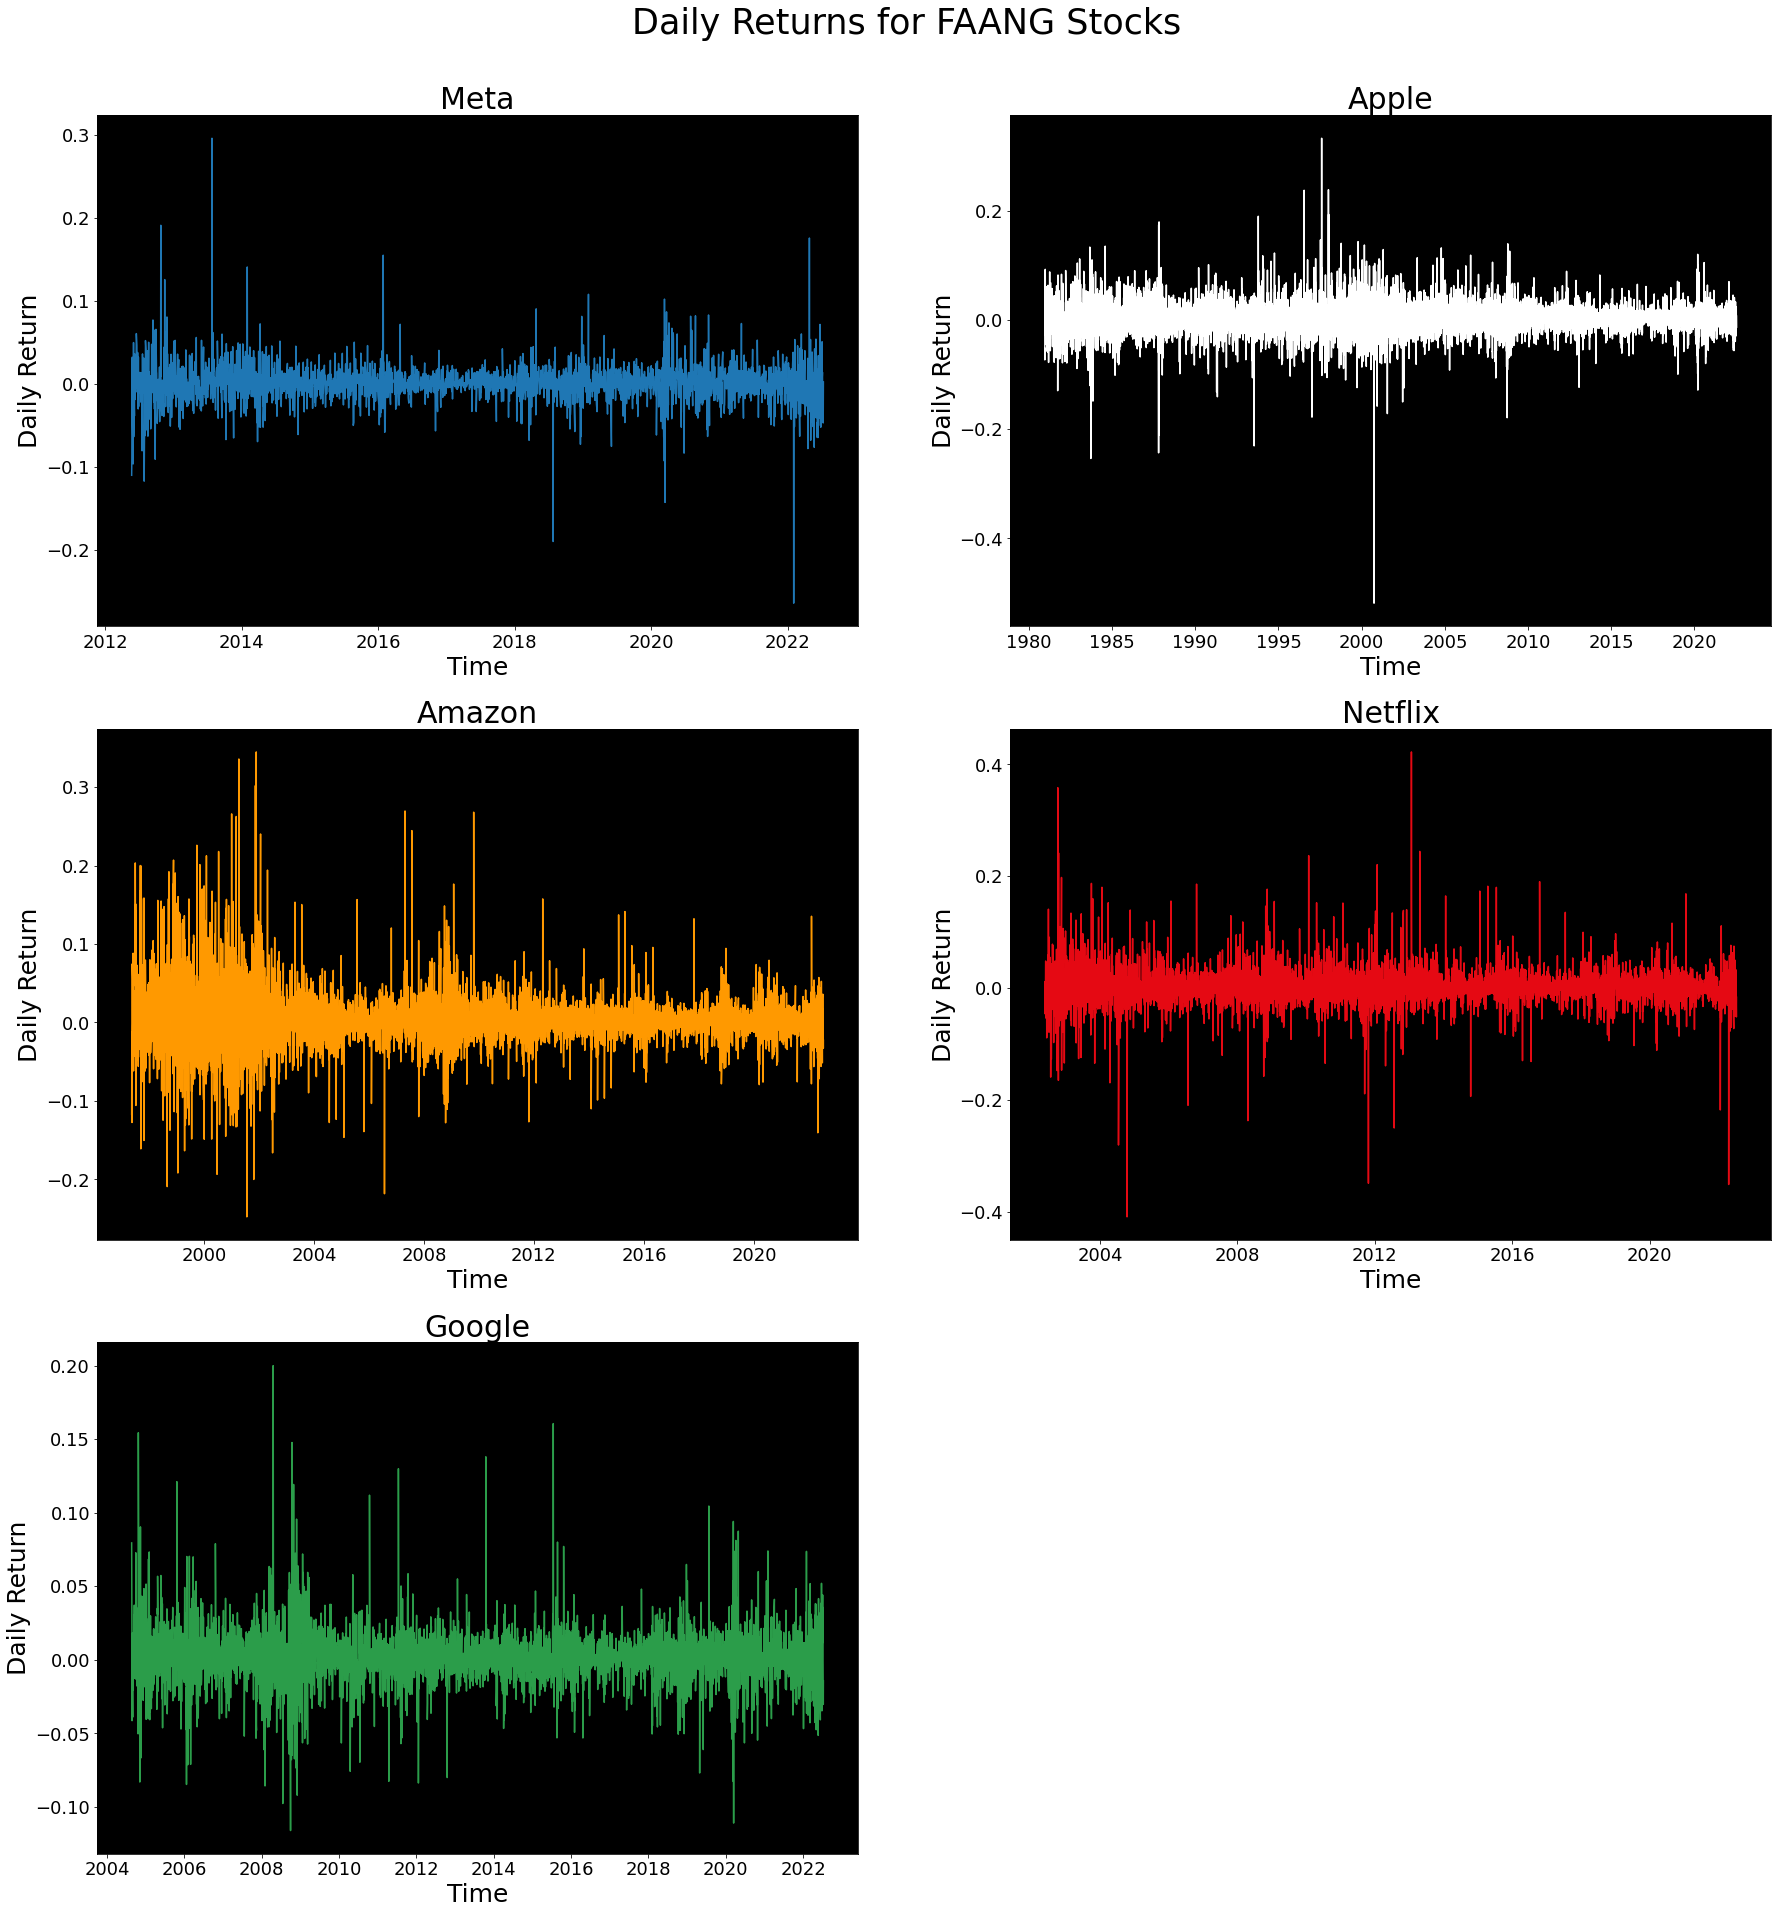

In [12]:
def visualize_faang_daily_return(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
    
    plt.suptitle('Daily Returns for FAANG Stocks', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(df_meta['Date'], df_meta['Daily Return'])
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Daily Return', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Daily Return'], color = 'white')
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Daily Return', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)

    axes[1][0].set_facecolor('black')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Daily Return'], color = '#FF9900')
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Daily Return', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)

    axes[1][1].set_facecolor('black')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Daily Return'], color = '#E50913')
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Daily Return', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)

    axes[2][0].set_facecolor('black')
    axes[2][0].plot(df_goog['Date'], df_goog['Daily Return'], color = '#2B9D4A')
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Daily Return', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    
    plt.subplots_adjust(top = 0.93)
    plt.show()
    
visualize_faang_daily_return(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df)

**Observations**: The price of stocks at today's close compared to the price of the same stock at yesterday's close is used to gauge the **day to day performance** of stocks. Positive daily returns indicate an increase in stock price for that specific day. No specific pattern or trend can be seen in the graphs we created for the daily return over time for FAANG stocks. As a result of the **large number of fluctuations** in the data across all graphs, it is challenging to pinpoint any particular trend in the movement of the stock.

# Predictions Using Bi-LSTMs
**Long Short Term Memory** is what LSTM stands for. It is a kind of ***Recurrent Neural Network*** that can learn long-term dependencies, particularly in issues involving sequence prediction. LSTMs differ from more conventional feedforward neural networks in that they feature **feedback connections**. With the help of this property, LSTMs may process whole data sequences (such as time series) without considering each data point separately. Instead, they can process new data points by using the information from earlier data in the sequence.

The output of an LSTM at a particular point in time is dependant on 3 things:
> - The current long-term memory of the network, known as the **cell state**
> - The output at the previous point in time, known as the **previous hidden state**
> - The **input data** at the current time step

LSTMs use a series of **gates** which control how the information in a sequence of data comes into, is stored in and leaves the network. There are 3 gates in a typical LSTM:
> - Forget Gate 
> - Input Gate
> - Output Gate

These gates can be thought of as filters and are each their own neural network. This is what the visual representation of an LSTM looks like:

<img src = "http://bit.ly/2i3kb1w" width = 50%>
<br>

## Bi-Directional LSTMs
These are like upgraded LSTMs. In **Bi-directional LSTMs**, our input flows in ***two directions***, making it different from the regular LSTM. With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bi-directional, we can make the input flow in both directions to preserve both the future and the past information. This is what a Bi-directional LSTM looks like:

<img src = "https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/07/image-5.jpeg" width = 50%>

In [13]:
def retrieve_closing_prices_only(data):
    data = data[['Close']]
    return data

def min_max_scaling(data):
    scaler = MinMaxScaler(feature_range = (0, 1))
    data = scaler.fit_transform(data.values)
    return scaler, data
    
meta_scaler, new_meta_df = min_max_scaling(retrieve_closing_prices_only(new_meta_df))
aapl_scaler, new_aapl_df = min_max_scaling(retrieve_closing_prices_only(new_aapl_df))
amzn_scaler, new_amzn_df = min_max_scaling(retrieve_closing_prices_only(new_amzn_df))
nflx_scaler, new_nflx_df = min_max_scaling(retrieve_closing_prices_only(new_nflx_df))
goog_scaler, new_goog_df = min_max_scaling(retrieve_closing_prices_only(new_goog_df))

new_meta_df

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.42022228],
       [0.39827139],
       [0.39934149]])

In [14]:
def split_and_reshape_data(dataframe, pred_days, company):
    prediction_days = pred_days
    
    train_size = int(np.ceil(len(dataframe) * 0.95))
    test_size = len(dataframe) - train_size
    print(f'The training size for {company.title()} is {train_size} rows')
    print(f'The testing size for {company.title()} is {test_size} rows')
    
    train_data = dataframe[0: int(train_size), :]
    test_data = dataframe[train_size - prediction_days:, :]
    
    X_train, y_train, X_test, y_test = [], [], [], []
    
    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data[i - prediction_days: i, 0])
        y_train.append(train_data[i, 0])
        
    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data[i - prediction_days: i, 0])
        y_test.append(test_data[i, 0])
        
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
        
    print('Data for {} split successfully'.format(company.title()))
    
    return X_train, y_train, X_test, y_test
    
X_train_meta, y_train_meta, X_test_meta, y_test_meta = split_and_reshape_data(new_meta_df, 30, 'META')
X_train_aapl, y_train_aapl, X_test_aapl, y_test_aapl = split_and_reshape_data(new_aapl_df, 30, 'APPLE')
X_train_amzn, y_train_amzn, X_test_amzn, y_test_amzn = split_and_reshape_data(new_amzn_df, 30, 'AMAZON')
X_train_nflx, y_train_nflx, X_test_nflx, y_test_nflx = split_and_reshape_data(new_nflx_df, 30, 'NETFLIX')
X_train_goog, y_train_goog, X_test_goog, y_test_goog = split_and_reshape_data(new_goog_df, 30, 'GOOGLE')

The training size for Meta is 2426 rows
The testing size for Meta is 127 rows
Data for Meta split successfully
The training size for Apple is 9959 rows
The testing size for Apple is 524 rows
Data for Apple split successfully
The training size for Amazon is 6015 rows
The testing size for Amazon is 316 rows
Data for Amazon split successfully
The training size for Netflix is 4816 rows
The testing size for Netflix is 253 rows
Data for Netflix split successfully
The training size for Google is 4280 rows
The testing size for Google is 225 rows
Data for Google split successfully


In [1]:
def create_and_train_bilstm_model(X_train, y_train, X_test, y_test, company):
    
    print('=========For {}========='.format(company))
    
    model = Sequential([
    Conv1D(32, 3, strides = 1, activation = 'relu', input_shape = [30, 1]),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(64)),
    Dense(32, activation = 'relu'),
    Dense(1)
    ])
    
    model.compile(optimizer = Adam(), loss = Huber(), metrics = ['mse', 'mae'])
    
    predictor = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)
    
    y_pred = model.predict(X_test)
    
    return model, predictor, y_pred

meta_model, meta_predictor, meta_y_pred = create_and_train_bilstm_model(X_train_meta, y_train_meta, X_test_meta, y_test_meta, 'Meta')
aapl_model, aapl_predictor, aapl_y_pred = create_and_train_bilstm_model(X_train_aapl, y_train_aapl, X_test_aapl, y_test_aapl, 'Apple')
amzn_model, amzn_predictor, amzn_y_pred = create_and_train_bilstm_model(X_train_amzn, y_train_amzn, X_test_amzn, y_test_amzn, 'Amazon')
nflx_model, nflx_predictor, nflx_y_pred = create_and_train_bilstm_model(X_train_nflx, y_train_nflx, X_test_nflx, y_test_nflx, 'Netflix')
goog_model, goog_predictor, goog_y_pred = create_and_train_bilstm_model(X_train_goog, y_train_goog, X_test_goog, y_test_goog, 'Google')

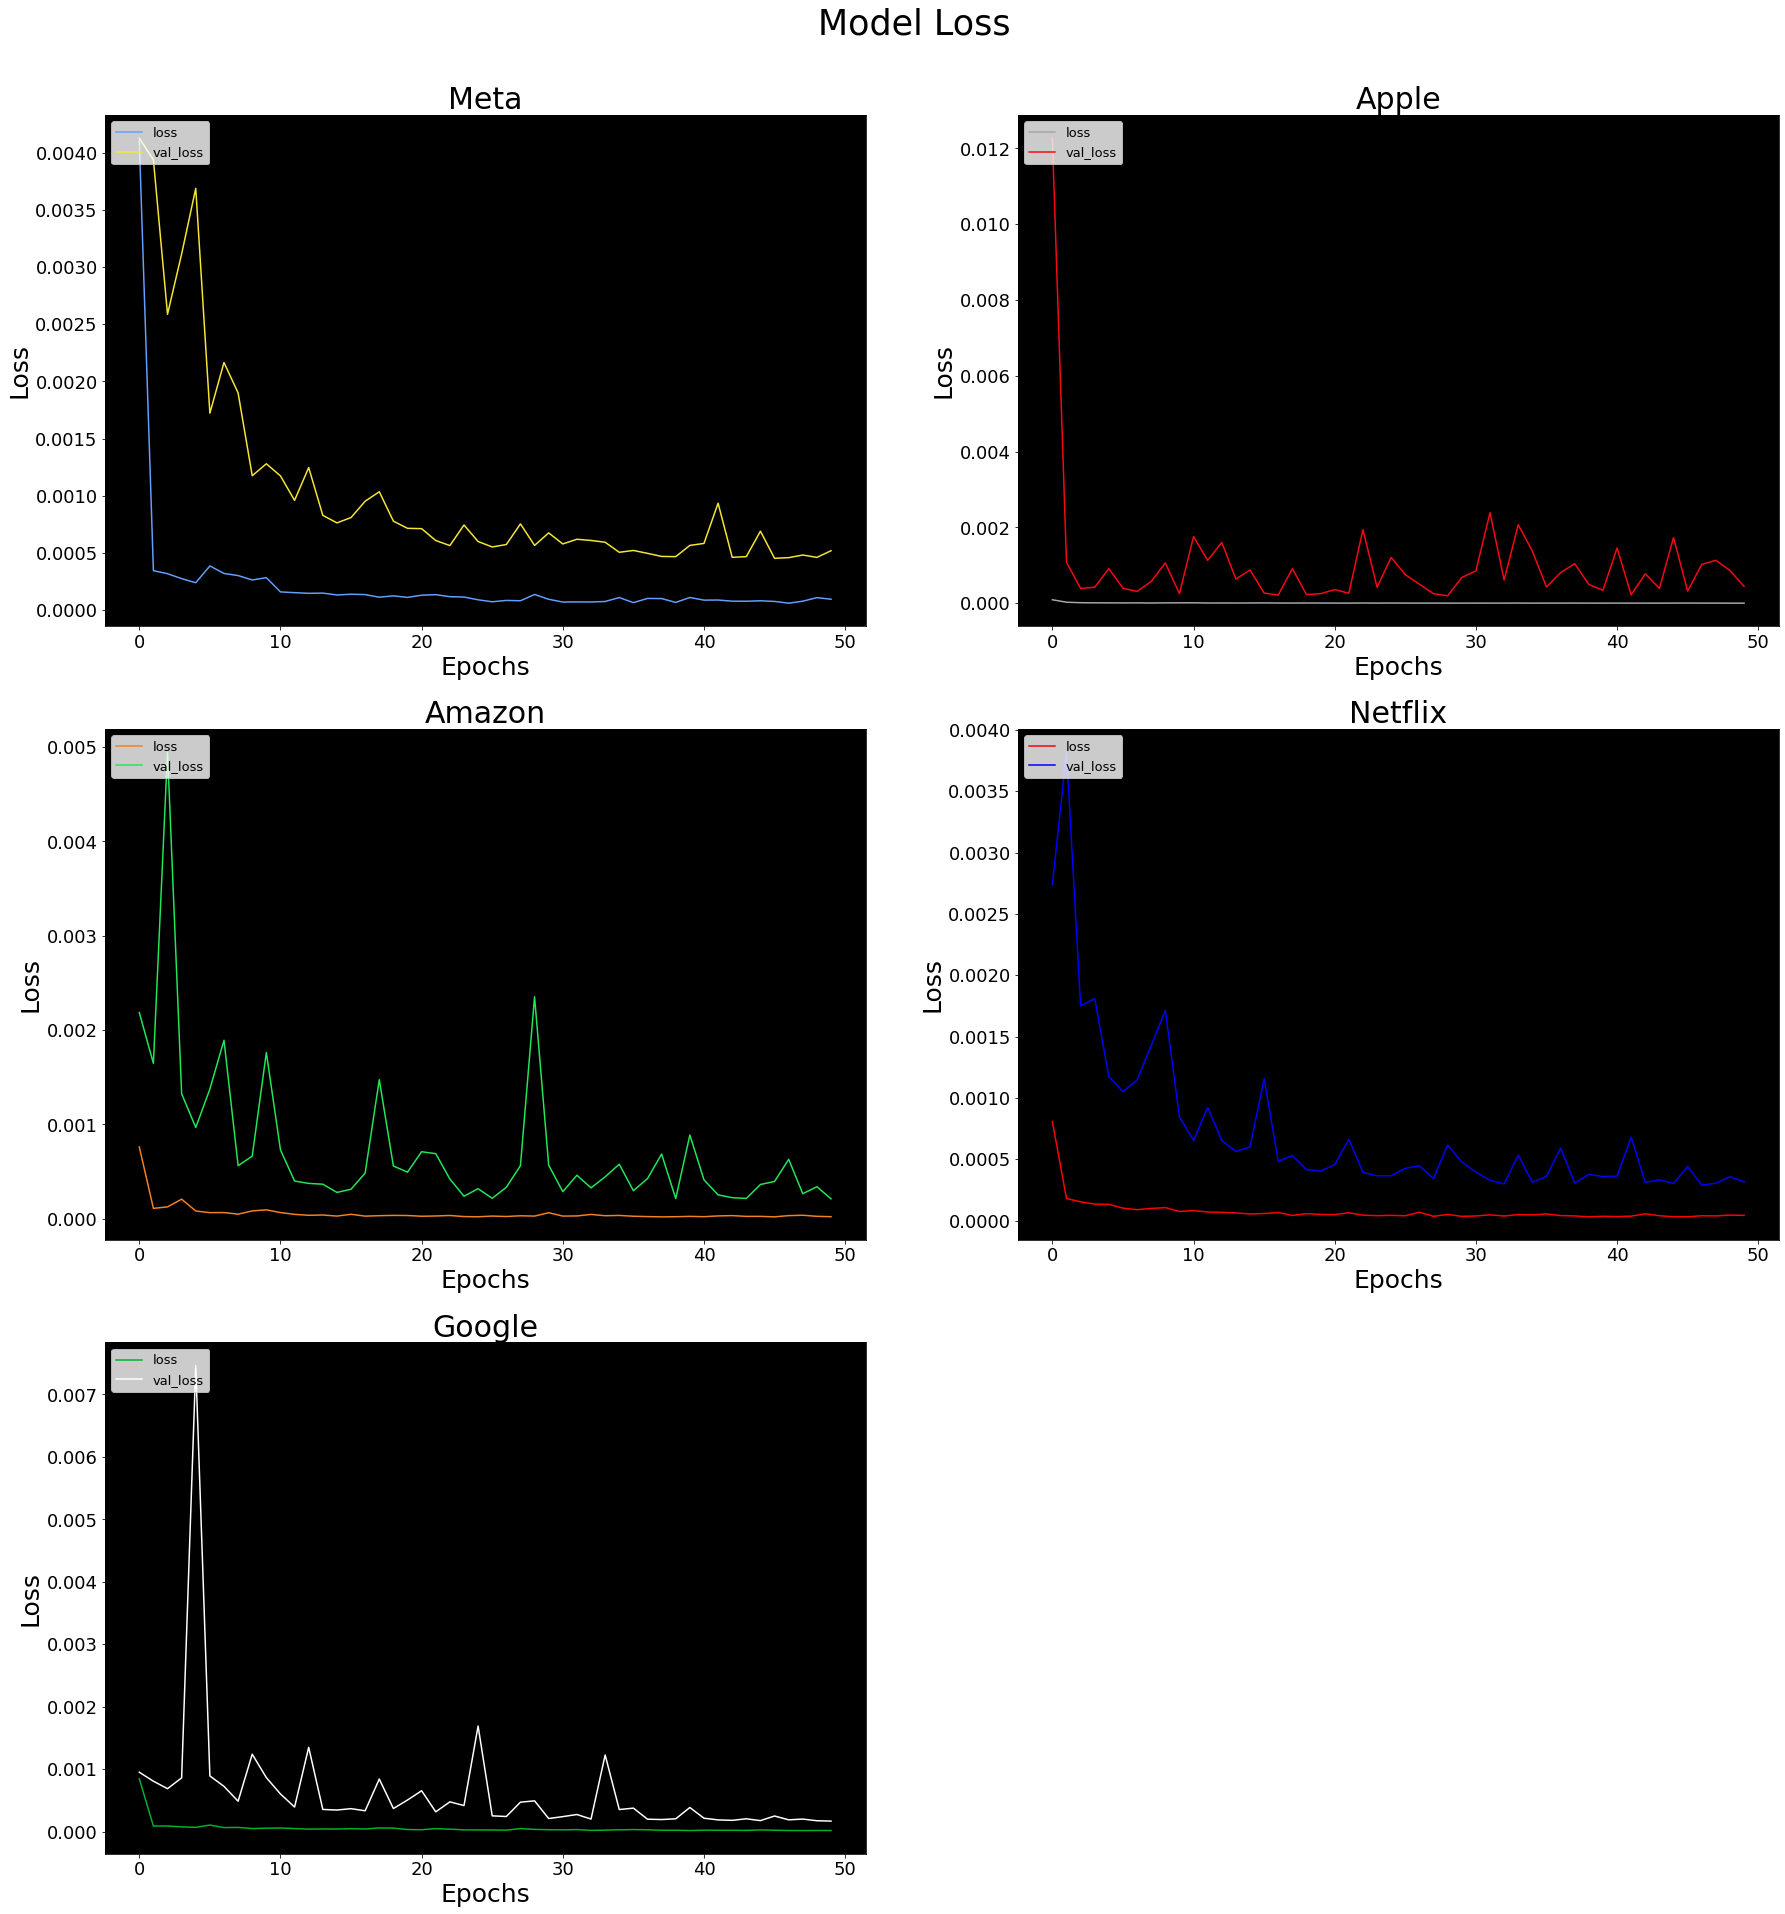

In [16]:
def visualize_model_loss(meta_predictor, aapl_predictor, amzn_predictor, nflx_predictor, goog_predictor):
    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
    
    plt.suptitle('Model Loss', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(meta_predictor.epoch, meta_predictor.history['loss'], label = 'loss', color = '#649EFF')
    axes[0][0].plot(meta_predictor.epoch, meta_predictor.history['val_loss'], label = 'val_loss', color = '#F5E633')
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Epochs', fontsize = 25)
    axes[0][0].set_ylabel('Loss', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 13)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(aapl_predictor.epoch, aapl_predictor.history['loss'], label = 'loss', color = '#A4A7AB')
    axes[0][1].plot(aapl_predictor.epoch, aapl_predictor.history['val_loss'], label = 'val_loss', color = '#F70913')
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Epochs', fontsize = 25)
    axes[0][1].set_ylabel('Loss', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 13)

    axes[1][0].set_facecolor('black')
    axes[1][0].plot(amzn_predictor.epoch, amzn_predictor.history['loss'], label = 'loss', color = '#F48020')
    axes[1][0].plot(amzn_predictor.epoch, amzn_predictor.history['val_loss'], label = 'val_loss', color = '#21E758')
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Epochs', fontsize = 25)
    axes[1][0].set_ylabel('Loss', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 13)

    axes[1][1].set_facecolor('black')
    axes[1][1].plot(nflx_predictor.epoch, nflx_predictor.history['loss'], label = 'loss', color = '#FF0000')
    axes[1][1].plot(nflx_predictor.epoch, nflx_predictor.history['val_loss'], label = 'val_loss', color = '#0000F7')
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Epochs', fontsize = 25)
    axes[1][1].set_ylabel('Loss', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 13)

    axes[2][0].set_facecolor('black')
    axes[2][0].plot(goog_predictor.epoch, goog_predictor.history['loss'], label = 'loss', color = '#00B22A')
    axes[2][0].plot(goog_predictor.epoch, goog_predictor.history['val_loss'], label = 'val_loss', color = '#FFFFFF')
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Epochs', fontsize = 25)
    axes[2][0].set_ylabel('Loss', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 13)
    
    plt.subplots_adjust(top = 0.93)
    plt.show()
    
visualize_model_loss(meta_predictor, aapl_predictor, amzn_predictor, nflx_predictor, goog_predictor)

In [17]:
def predictions_inverse_scaler_rmse(company, scaler, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    
    print(f'The RMSE for {company} is {rmse}')
    
    return y_pred, y_test

y_pred_meta, y_test_meta = predictions_inverse_scaler_rmse('Meta', meta_scaler, meta_model, X_test_meta, y_test_meta)
y_pred_aapl, y_test_aapl = predictions_inverse_scaler_rmse('Apple', aapl_scaler, aapl_model, X_test_aapl, y_test_aapl)
y_pred_amzn, y_test_amzn = predictions_inverse_scaler_rmse('Amazon', amzn_scaler, amzn_model, X_test_amzn, y_test_amzn)
y_pred_nflx, y_test_nflx = predictions_inverse_scaler_rmse('Netflix', nflx_scaler, nflx_model, X_test_nflx, y_test_nflx)
y_pred_goog, y_test_goog = predictions_inverse_scaler_rmse('Google', goog_scaler, goog_model, X_test_goog, y_test_goog)

The RMSE for Meta is 11.760985447405986
The RMSE for Apple is 5.409949633038625
The RMSE for Amazon is 3.8252909914903293
The RMSE for Netflix is 17.389740087068095
The RMSE for Google is 54.17833443114466


In [18]:
def create_dataframes_for_plots(dataframe, y_pred):
    plot_train = dataframe[:int(np.ceil(len(dataframe) * 0.95))]
    plot_test = dataframe[int(np.ceil(len(dataframe) * 0.95)):]
    plot_test['Predictions'] = y_pred
    return plot_train, plot_test

plot_train_meta, plot_test_meta = create_dataframes_for_plots(df_meta, y_pred_meta)
plot_train_aapl, plot_test_aapl = create_dataframes_for_plots(df_aapl, y_pred_aapl)
plot_train_amzn, plot_test_amzn = create_dataframes_for_plots(df_amzn, y_pred_amzn)
plot_train_nflx, plot_test_nflx = create_dataframes_for_plots(df_nflx, y_pred_nflx)
plot_train_goog, plot_test_goog = create_dataframes_for_plots(df_goog, y_pred_goog)

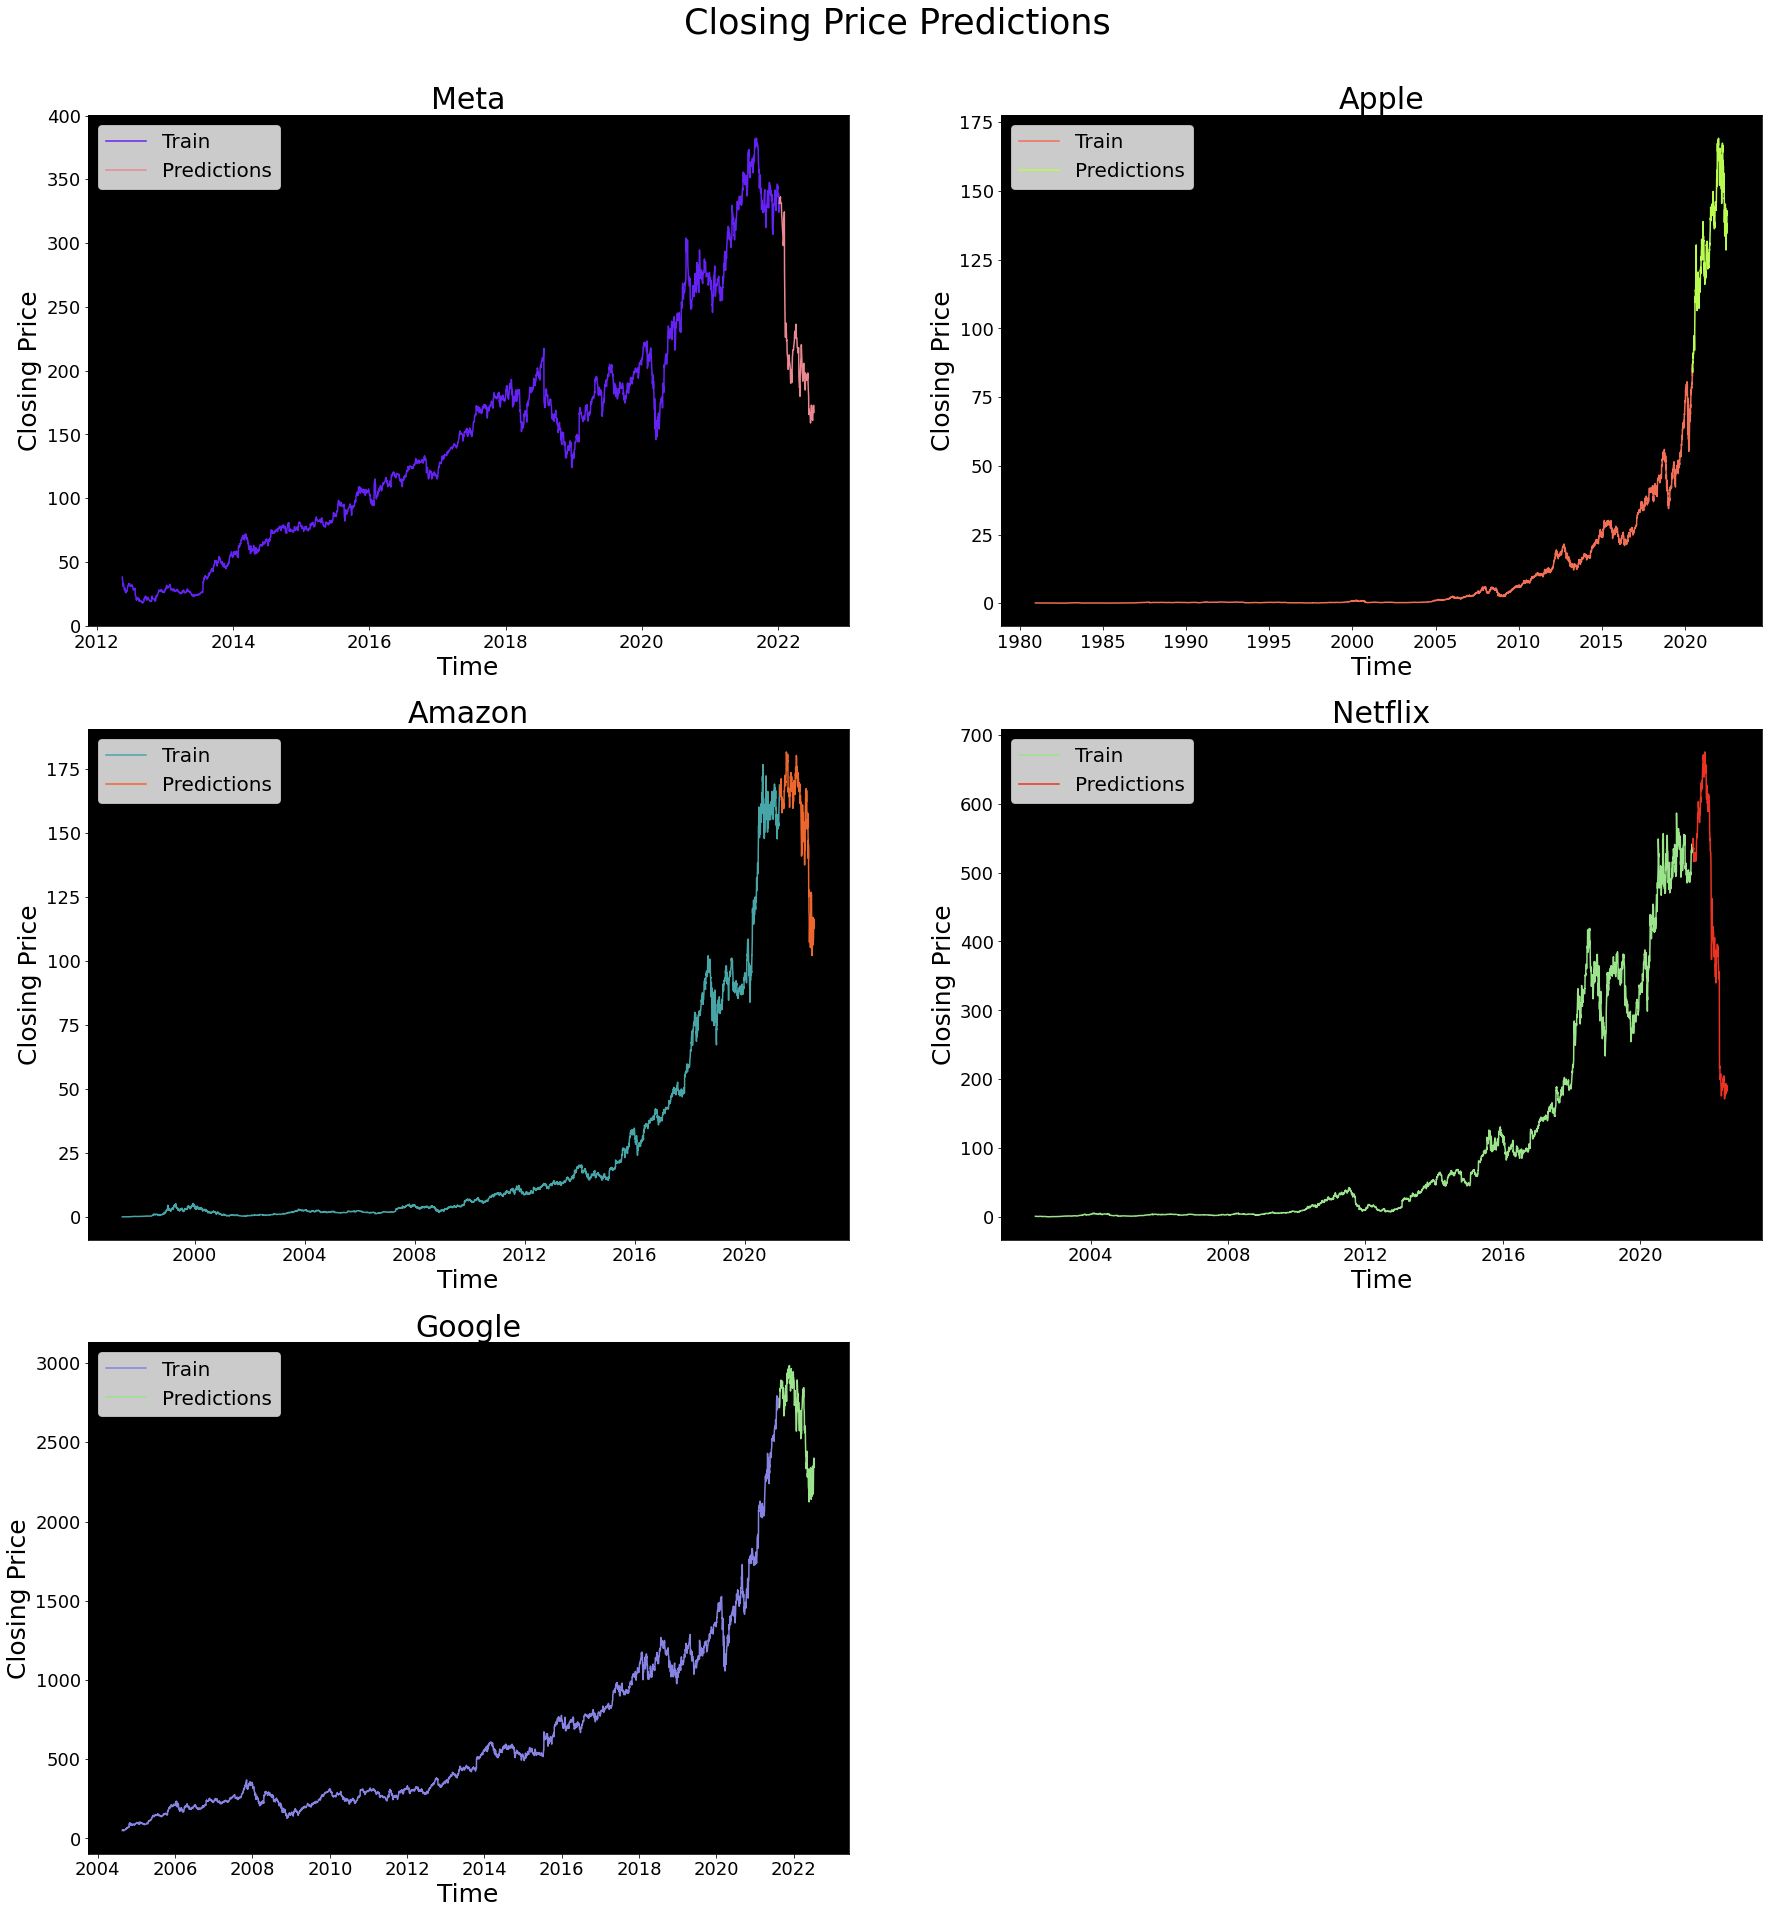

In [19]:
def plot_model_predictions(plot_train_meta, plot_test_meta, plot_train_aapl, plot_test_aapl, plot_train_amzn, 
                           plot_test_amzn, plot_train_nflx, plot_test_nflx, plot_train_goog, plot_test_goog):
    
    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)
    
    plt.suptitle('Closing Price Predictions', verticalalignment = 'top', horizontalalignment = 'center', fontsize = 35)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(plot_train_meta['Date'], plot_train_meta['Close'], color = '#6522F5', label = 'Train')
    axes[0][0].plot(plot_test_meta['Date'], plot_test_meta['Predictions'], color = '#EB8791', label = 'Predictions')
    axes[0][0].set_title('Meta', fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Closing Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)
    axes[0][0].legend(loc = 'upper left', fontsize = 20)
    
    axes[0][1].set_facecolor('black')
    axes[0][1].plot(plot_train_aapl['Date'], plot_train_aapl['Close'], color = '#F26E55', label = 'Train')
    axes[0][1].plot(plot_test_aapl['Date'], plot_test_aapl['Predictions'], color = '#B9FB50', label = 'Predictions')
    axes[0][1].set_title('Apple', fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Closing Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)
    axes[0][1].legend(loc = 'upper left', fontsize = 20)
    
    axes[1][0].set_facecolor('black')
    axes[1][0].plot(plot_train_amzn['Date'], plot_train_amzn['Close'], color = '#47A5A8', label = 'Train')
    axes[1][0].plot(plot_test_amzn['Date'], plot_test_amzn['Predictions'], color = '#ED672C', label = 'Predictions')
    axes[1][0].set_title('Amazon', fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Closing Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)
    axes[1][0].legend(loc = 'upper left', fontsize = 20)
    
    axes[1][1].set_facecolor('black')
    axes[1][1].plot(plot_train_nflx['Date'], plot_train_nflx['Close'], color = '#9BE48B', label = 'Train')
    axes[1][1].plot(plot_test_nflx['Date'], plot_test_nflx['Predictions'], color = '#EB3323', label = 'Predictions')
    axes[1][1].set_title('Netflix', fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Closing Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)
    axes[1][1].legend(loc = 'upper left', fontsize = 20)
    
    axes[2][0].set_facecolor('black')
    axes[2][0].plot(plot_train_goog['Date'], plot_train_goog['Close'], color = '#8783E3', label = 'Train')
    axes[2][0].plot(plot_test_goog['Date'], plot_test_goog['Predictions'], color = '#9BE48B', label = 'Predictions')
    axes[2][0].set_title('Google', fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Closing Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)
    axes[2][0].legend(loc = 'upper left', fontsize = 20)
    
    plt.subplots_adjust(top = 0.93)
    plt.show()
    
plot_model_predictions(plot_train_meta, plot_test_meta, plot_train_aapl, plot_test_aapl, plot_train_amzn, 
                           plot_test_amzn, plot_train_nflx, plot_test_nflx, plot_train_goog, plot_test_goog)